## Breast cancer

    Breast cancer is the most common cancer in the world, ranking 1 among women.

    According to WHO experts, from 800,000 to 1 million new cases of breast cancer are registered annually in the world. This type of cancer ranks second in the number of deaths from cancer in women.
    
    
    This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

## STEP 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_auc_score, 
                             accuracy_score, 
                             f1_score, recall_score, 
                             precision_score, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay,
                             roc_curve)
from tabulate import tabulate

## STEP 2: Data analysis

In [2]:
breast_cancer = pd.read_csv('../My_project/Breast_Cancer.csv')
breast_cancer

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [3]:
breast_cancer.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
breast_cancer.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
breast_cancer.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [7]:
breast_cancer.drop(['differentiate'], axis = 1, inplace = True )
breast_cancer

Age   Race Marital Status T Stage  N Stage 6th Stage Grade   A Stage  \
0      68  White        Married       T1      N1       IIA     3  Regional   
1      50  White        Married       T2      N2      IIIA     2  Regional   
2      58  White       Divorced       T3      N3      IIIC     2  Regional   
3      58  White        Married       T1      N1       IIA     3  Regional   
4      47  White        Married       T2      N1       IIB     3  Regional   
...   ...    ...            ...      ...     ...       ...   ...       ...   
4019   62  Other        Married       T1      N1       IIA     2  Regional   
4020   56  White       Divorced       T2      N2      IIIA     2  Regional   
4021   68  White        Married       T2      N1       IIB     2  Regional   
4022   58  Black       Divorced       T2      N1       IIB     2  Regional   
4023   46  White        Married       T2      N1       IIB     2  Regional   

      Tumor Size Estrogen Status Progesterone Status  Regional Node Examined  \
0              4        Positive            Positive                      24   
1             35        Positive            Positive                      14   
2             63        Positive            Positive                      14   
3             18        Positive            Positive                       2   
4             41        Positive            Positive                       3   
...          ...             ...                 ...                     ...   
4019           9        Positive            Positive                       1   
4020          46        Positive            Positive                      14   
4021          22        Positive            Negative                      11   
4022          44        Positive            Positive                      11   
4023          30        Positive            Positive                       7   

      Reginol Node Positive  Survival Months Status  
0                         1               60  Alive  
1                         5               62  Alive  
2                         7               75  Alive  
3                         1               84  Alive  
4                         1               50  Alive  
...                     ...              ...    ...  
4019                      1               49  Alive  
4020                      8               69  Alive  
4021                      3               69  Alive  
4022                      1               72  Alive  
4023                      2              100  Alive  

[4024 rows x 15 columns]

    The [differentiate] variable is the [Grade] variable, so delete it.

   ## STEP 3: Visualization 

In [8]:
def figure (breast_cancer, var):
    fig = px.histogram(breast_cancer, x = var, color = var, template = "plotly_white")
    fig.show()

In [9]:
for i in breast_cancer.columns:
    figure(breast_cancer, i)

### distribution in relation to the target 'Status'

In [10]:
def countplot(breast_cancer, var):
    sns.countplot(data = breast_cancer, x = var, hue = 'Status', palette = ['brown', 'coral'])
    sns.set(rc={'figure.figsize':(15,8)})
    plt.show()

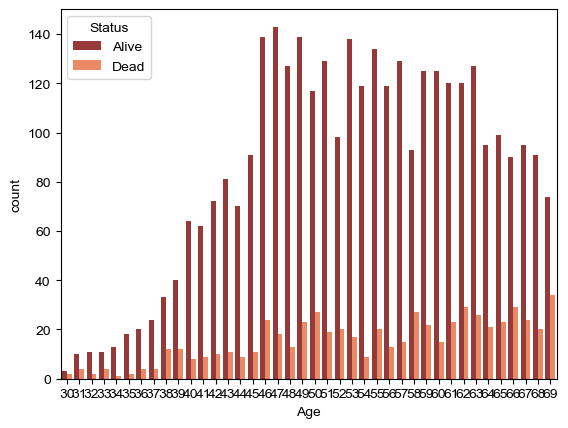

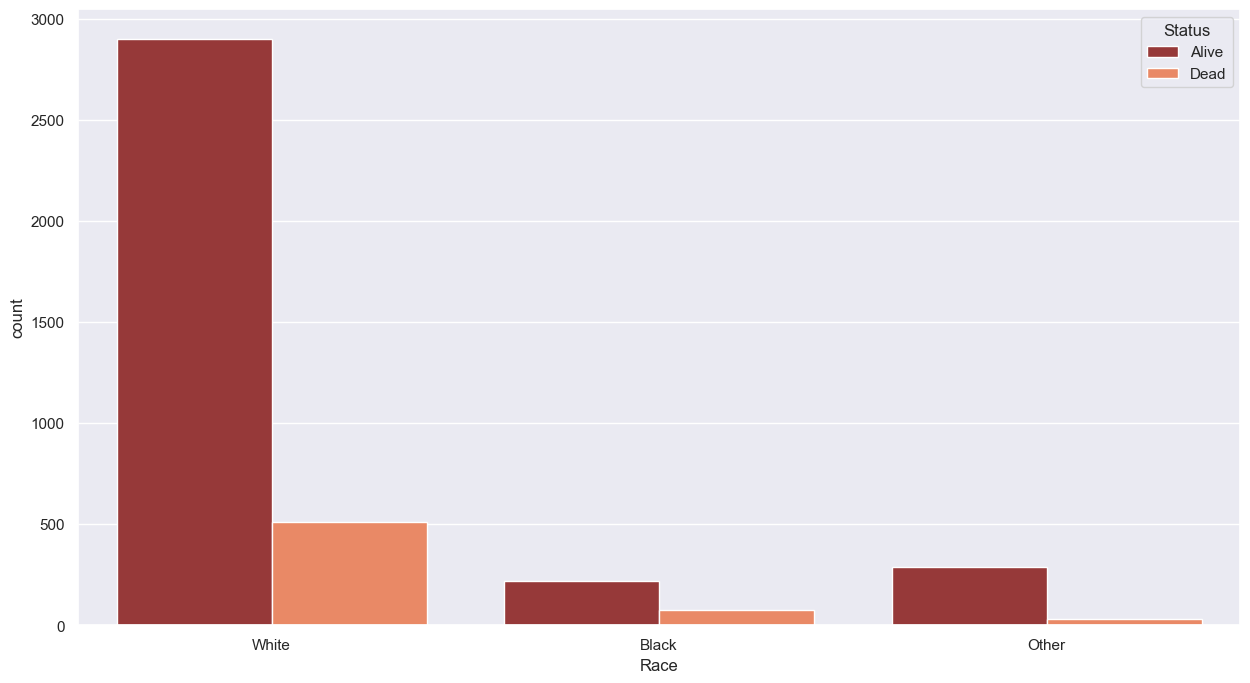

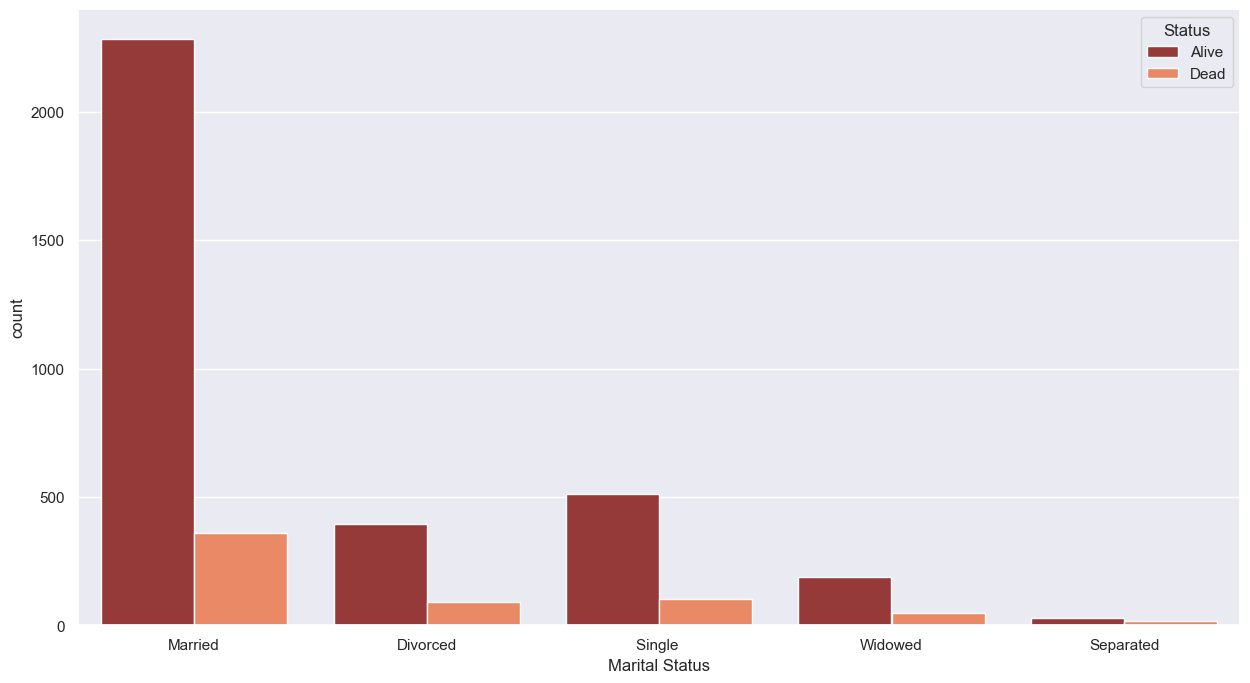

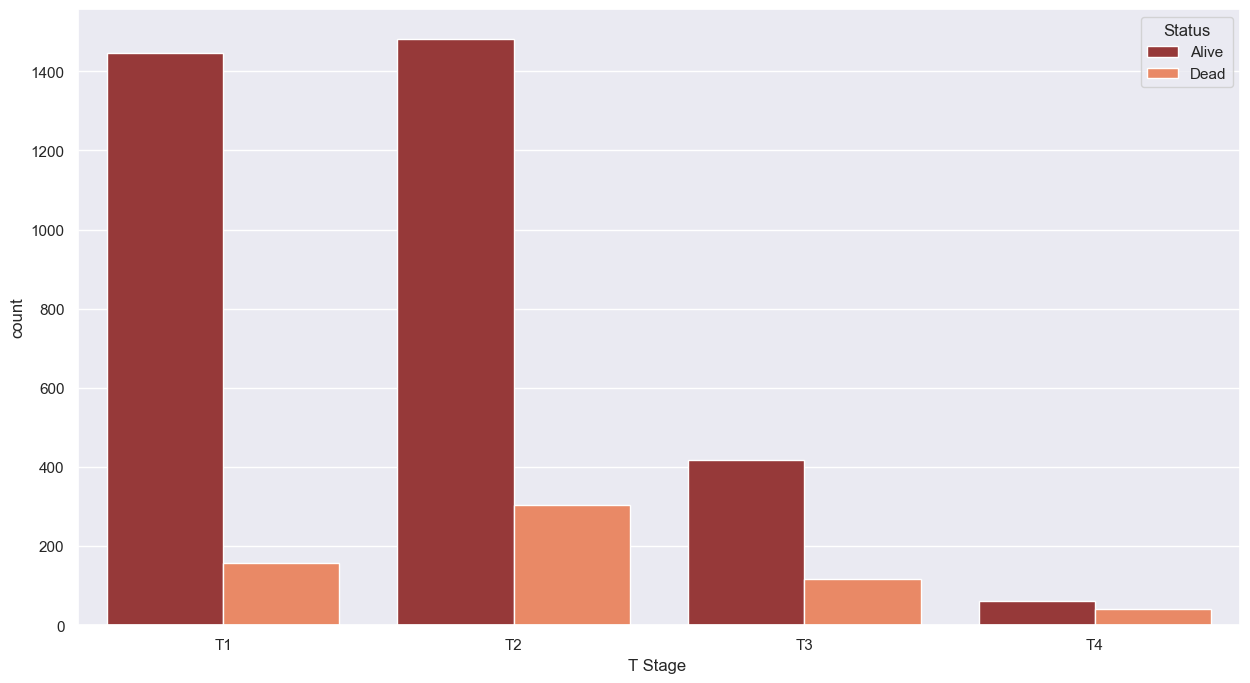

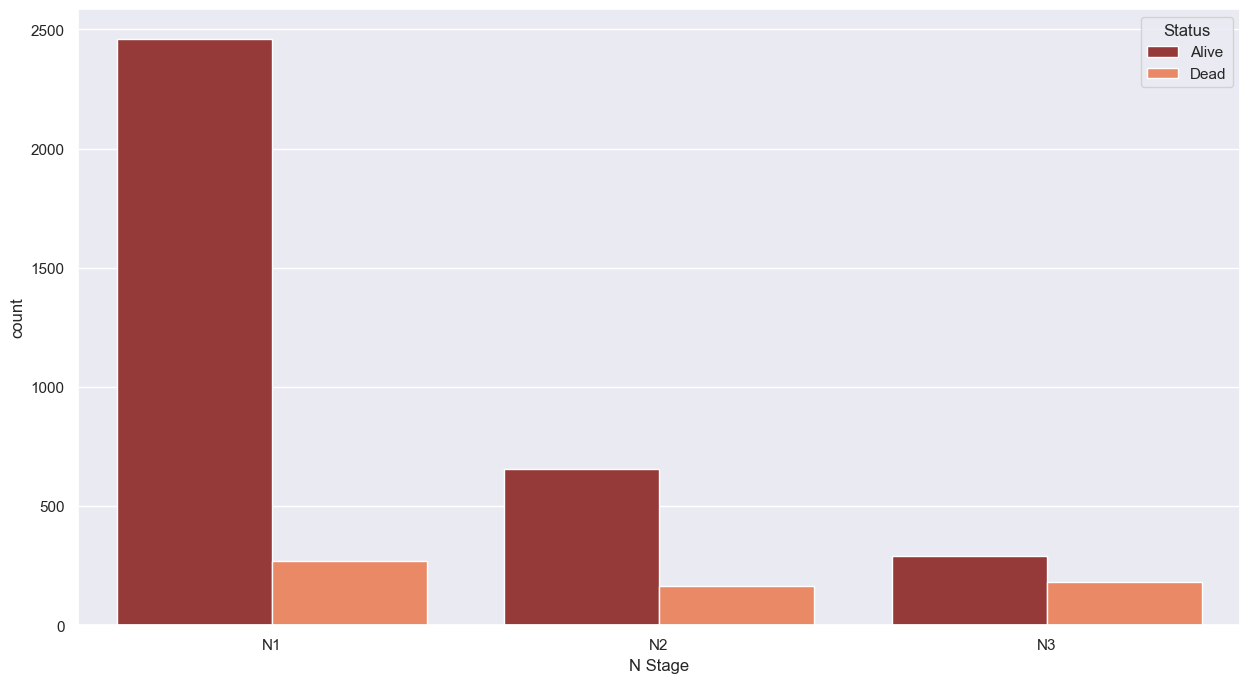

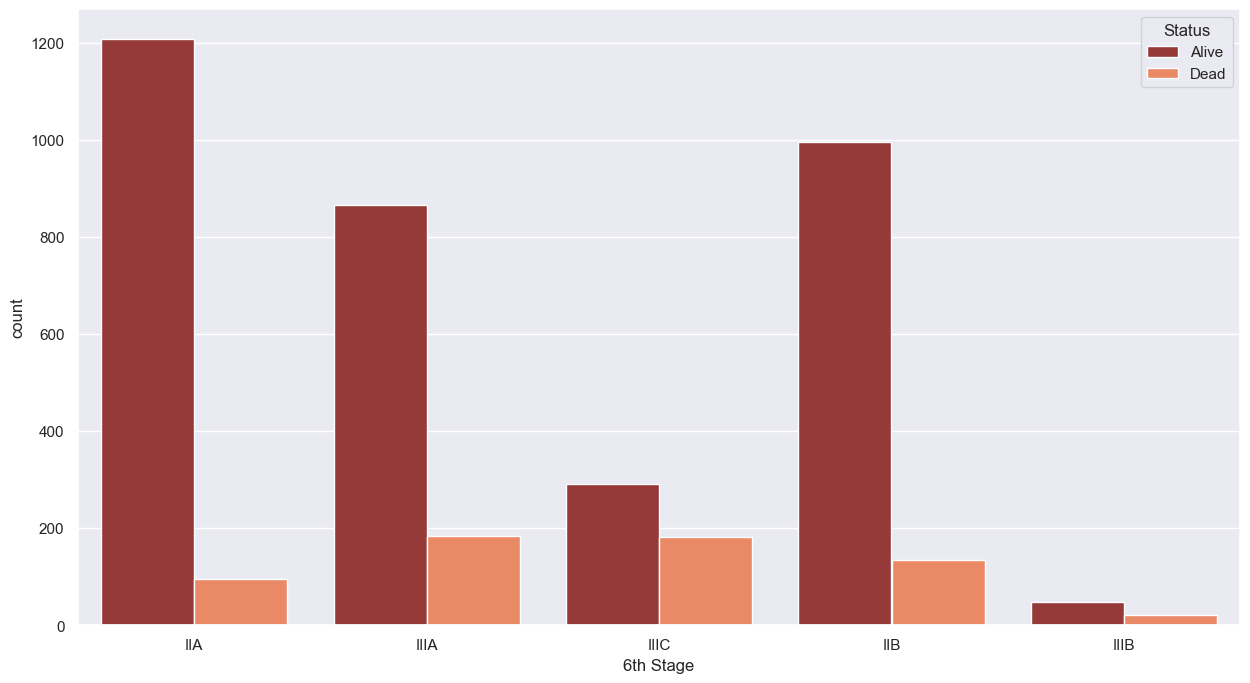

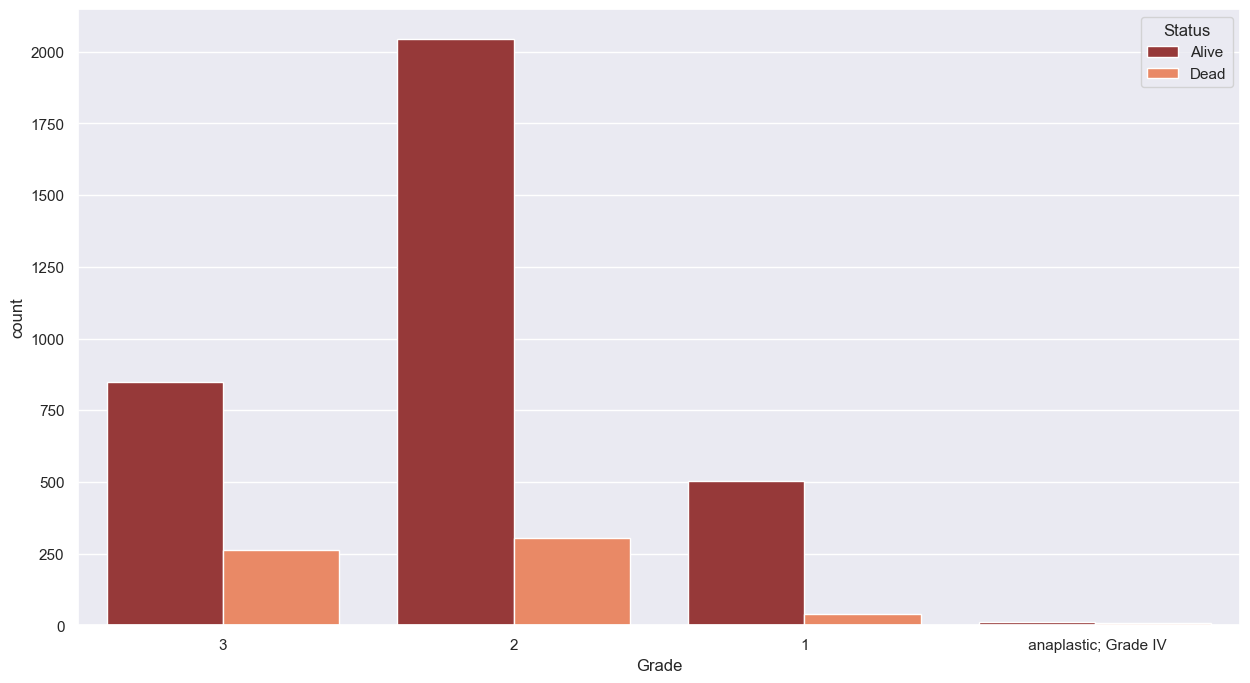

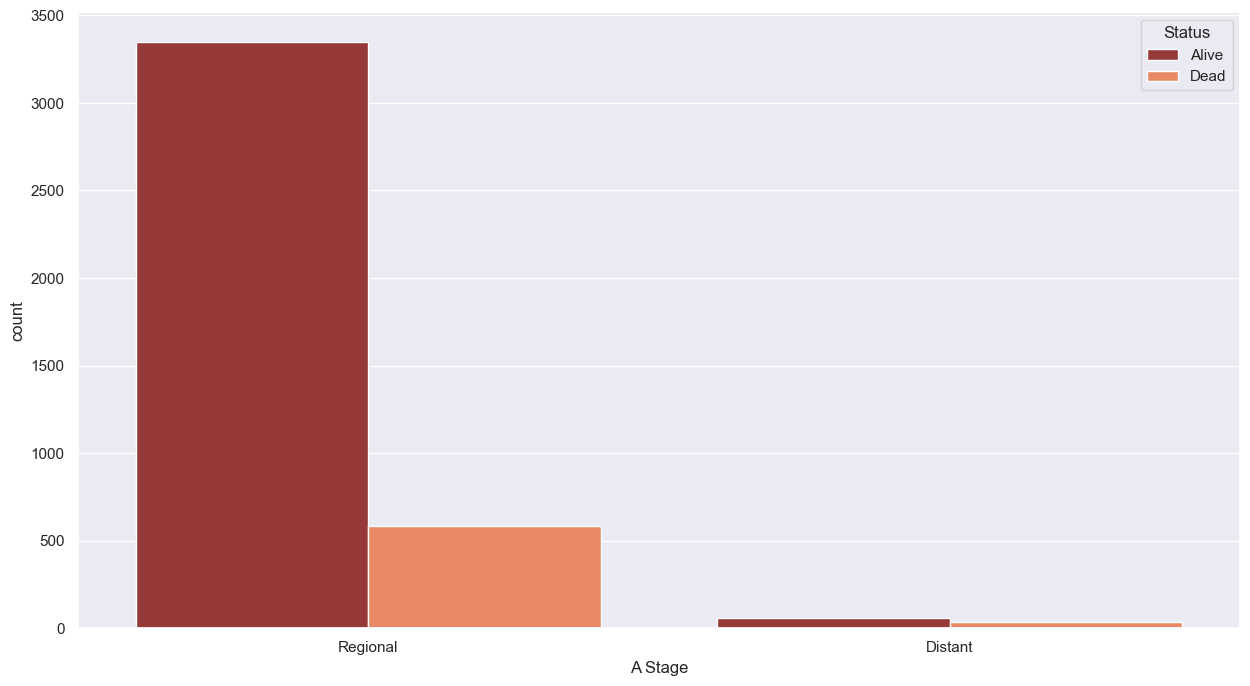

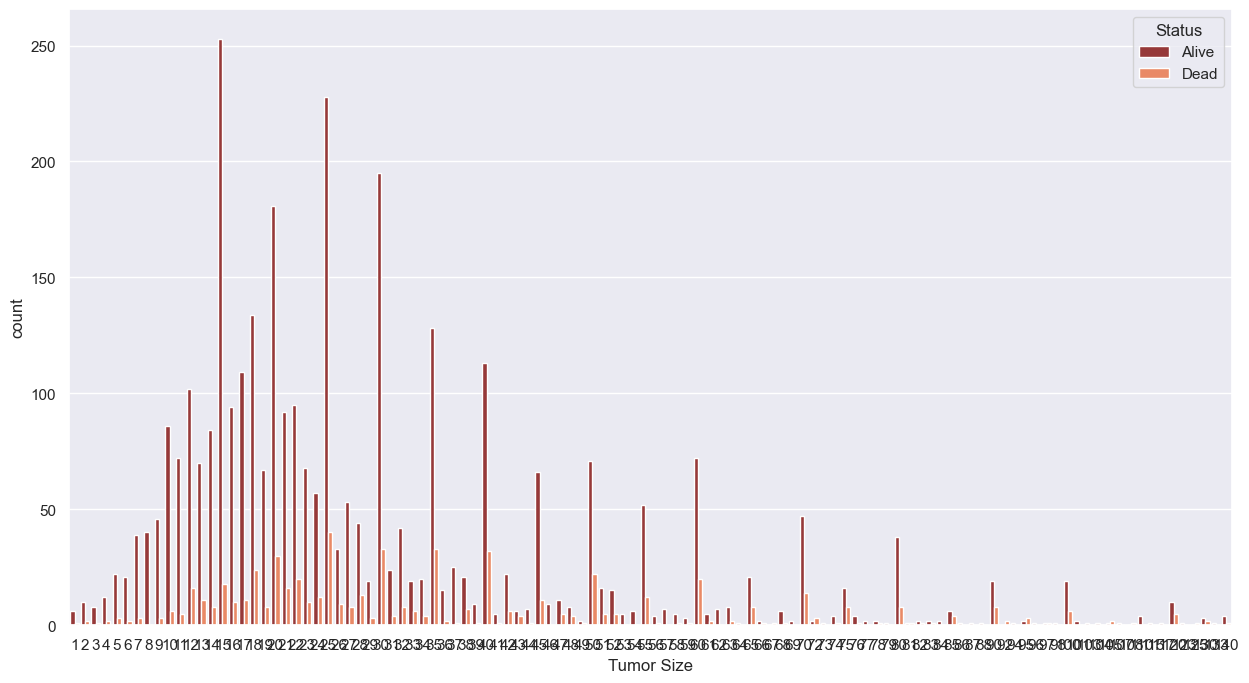

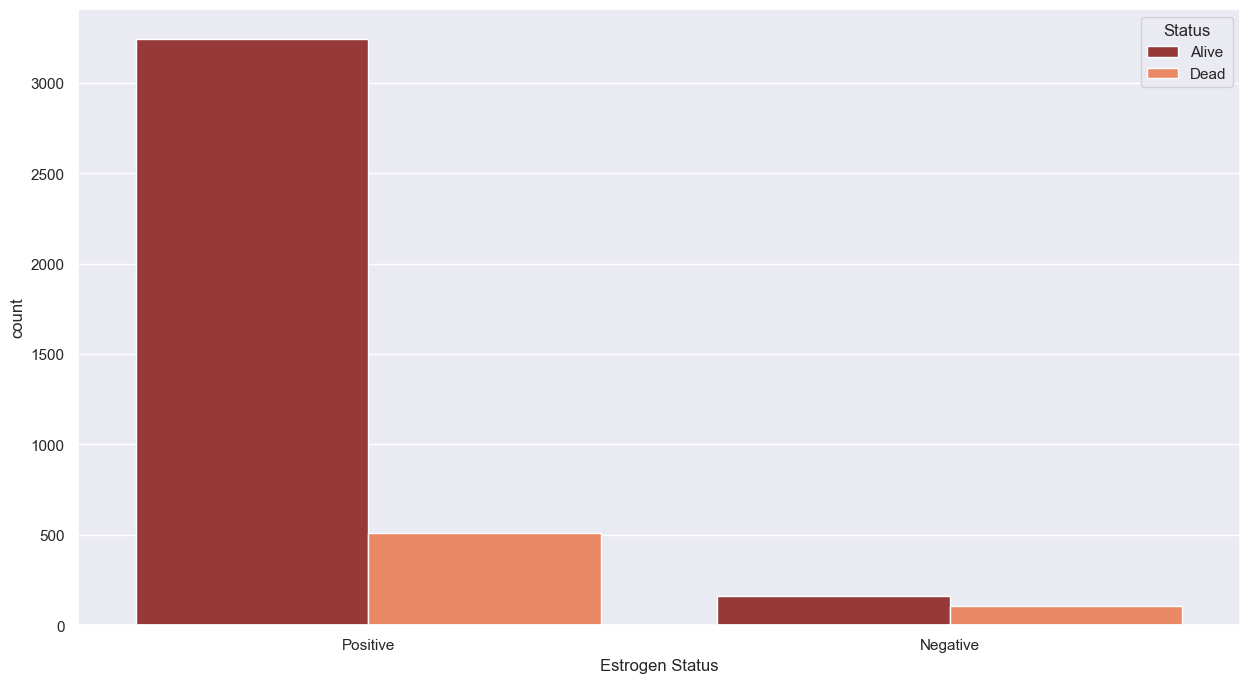

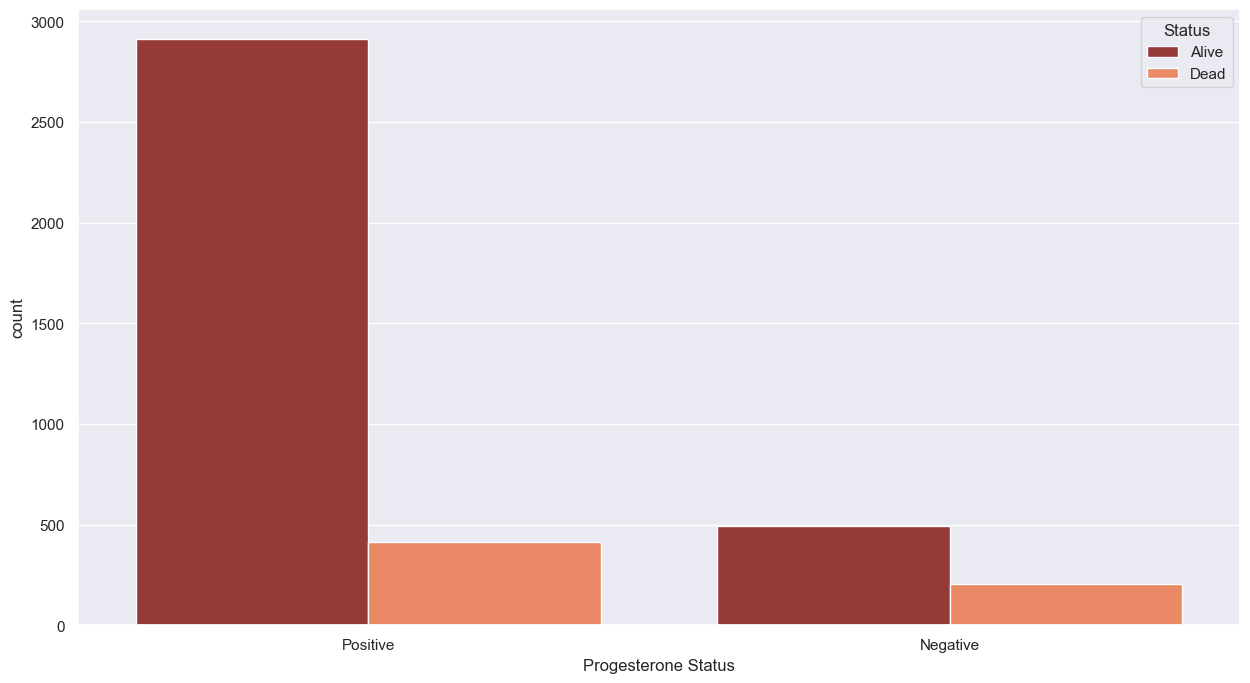

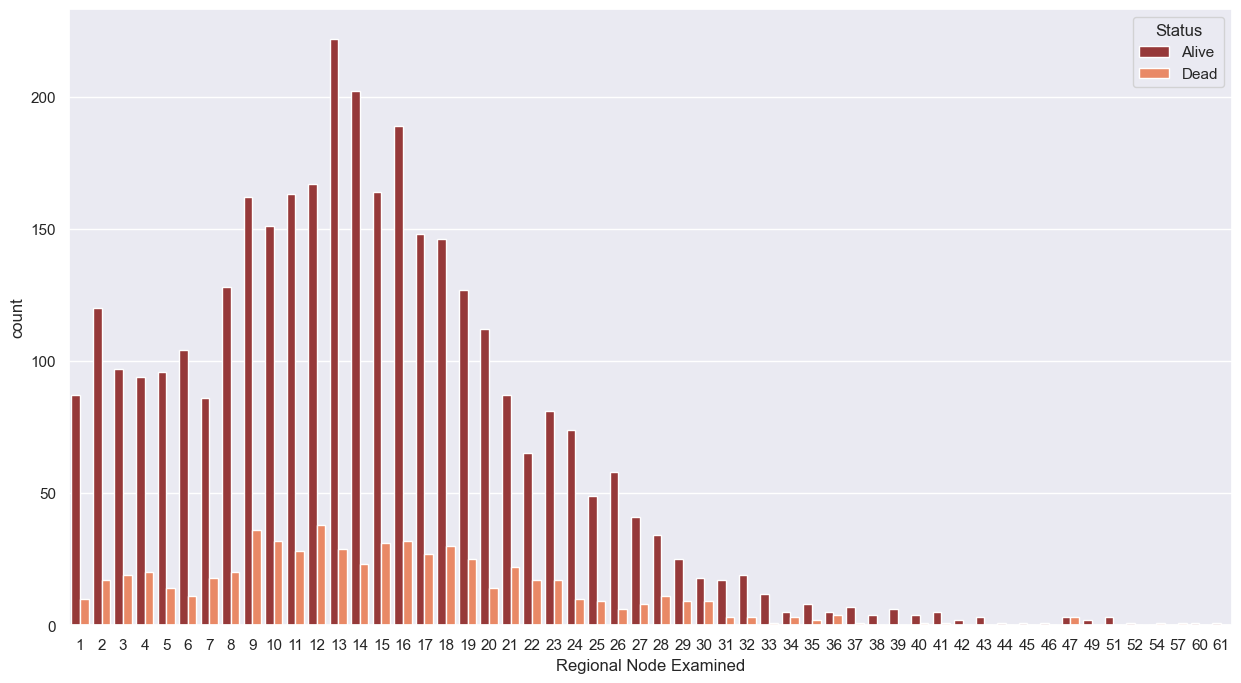

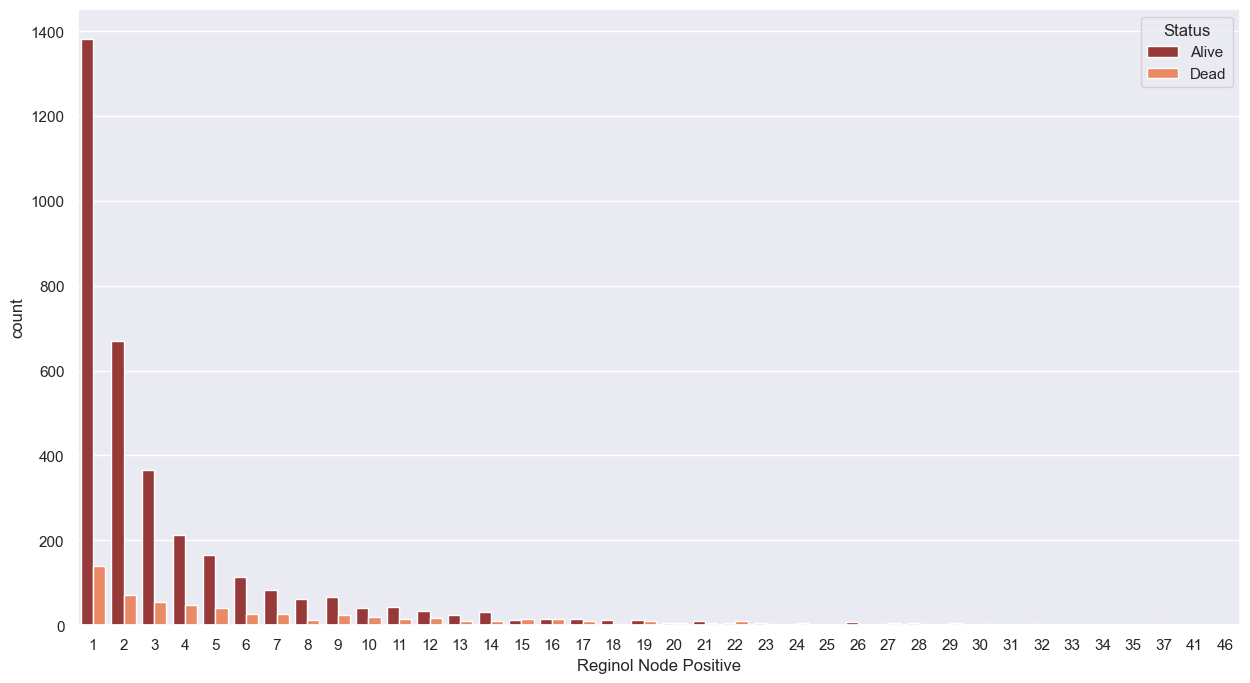

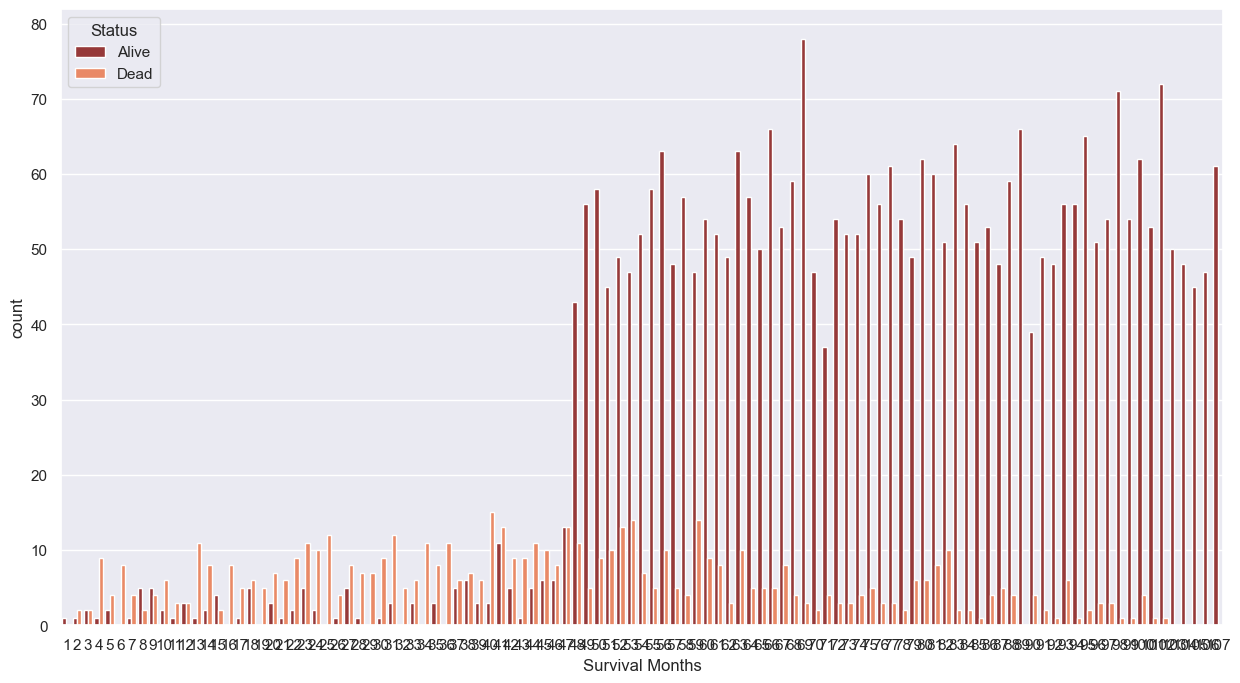

In [11]:
data = breast_cancer.drop('Status', axis = 1)
for i in data.columns:
    countplot(breast_cancer, i)

### target - Status

<AxesSubplot:ylabel='None'>

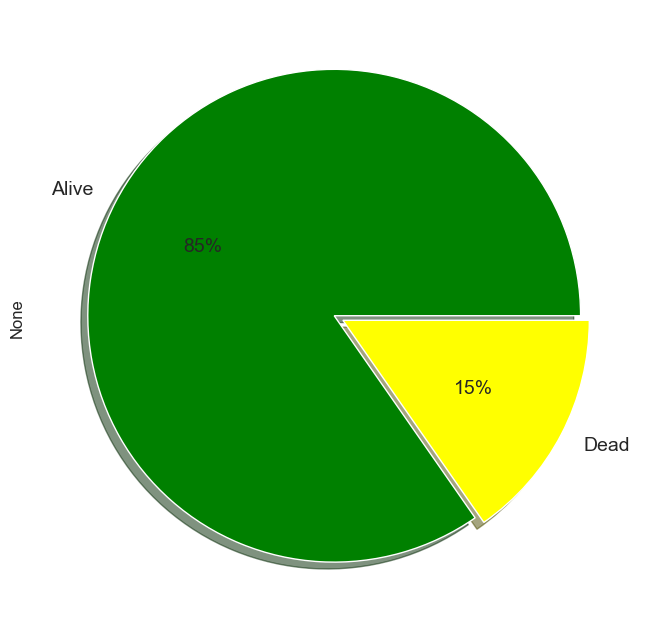

In [12]:
breast_cancer.groupby('Status').size().plot(kind='pie', textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02],shadow=True,
                                           colors=['green', 'yellow'])

    15% died of breast cancer, 85% are alive. 
    unbalanced dataset 

## Age

<AxesSubplot:xlabel='Age', ylabel='count'>

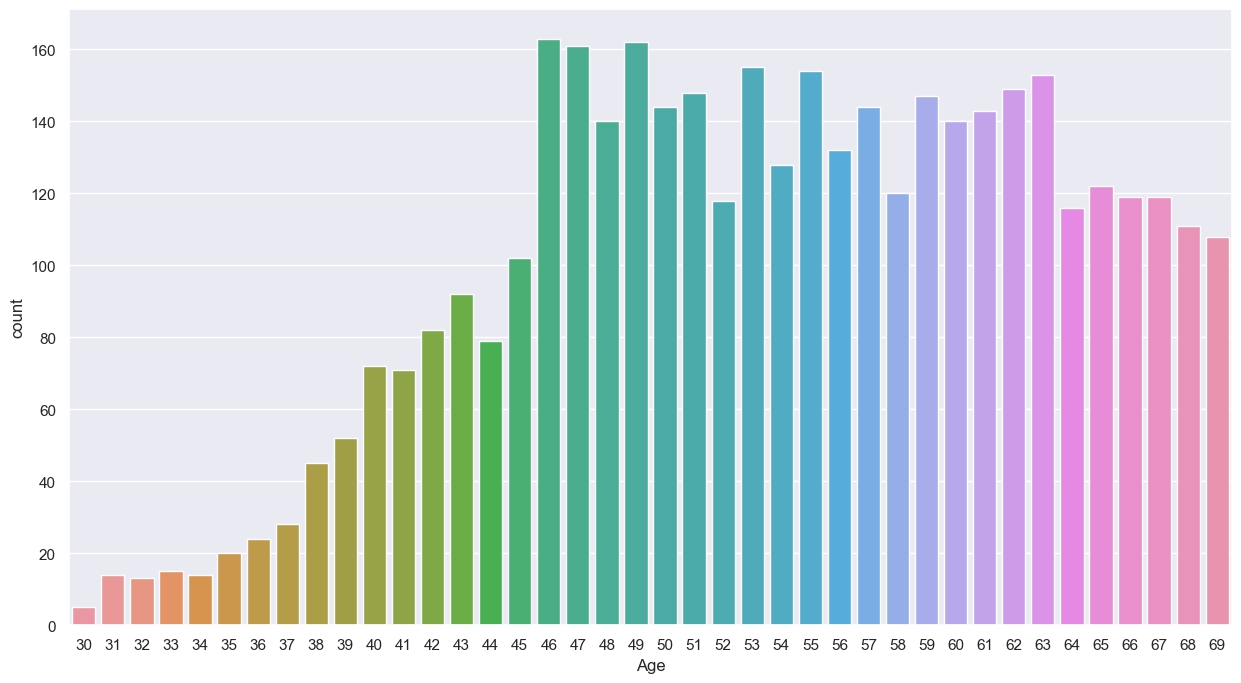

In [13]:
plt.figure(figsize= (15, 8))
sns.countplot(x = 'Age', data = breast_cancer)

    Breast cancer occurs at a young age from the age of 30. 
    The old age is 69 years. 

### Race

<AxesSubplot:ylabel='None'>

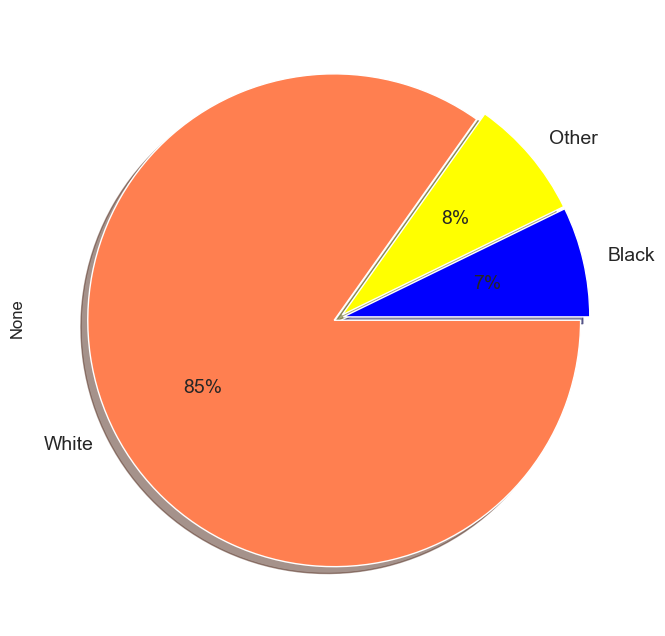

In [14]:
breast_cancer.groupby('Race').size().plot(kind='pie', textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02, 0.02],shadow=True,
                                           colors=['blue', 'yellow', 'coral'])

    In this dataset, the white race has the disease more often - 85%, black race = 7% %, others 8%

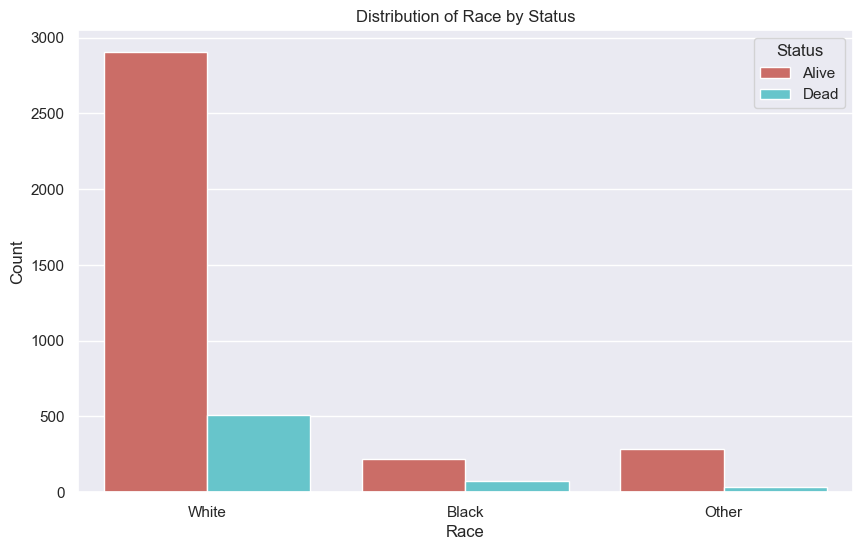

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=breast_cancer, x = 'Race', hue = 'Status', palette='hls')
plt.title('Distribution of Race by Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Alive', 'Dead'])
plt.show()

    The white race dies more often than others. 

### Marital Status

Text(0, 0.5, 'Count')

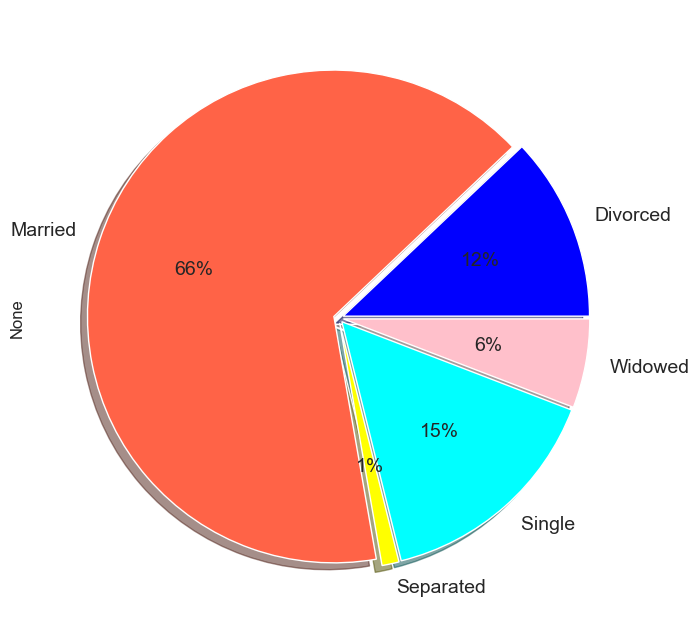

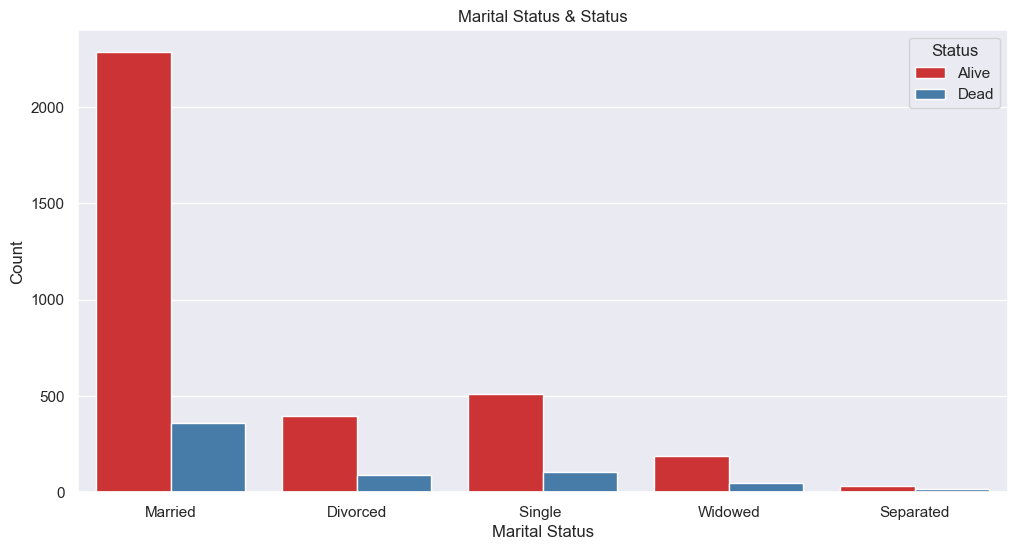

In [16]:
breast_cancer.groupby(['Marital Status']).size().plot(kind='pie', textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.02, 0.02, 0.02, 0.02],shadow=True,
                                           colors=['blue', 'tomato', 'yellow', 'cyan', 'pink'])


plt.figure(figsize=(12, 6))
sns.countplot(data = breast_cancer, x= breast_cancer['Marital Status'], hue = breast_cancer['Status'], palette='Set1')
plt.title('Marital Status & Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

     Breast cancer is more common in married women - 66% - and they are more likely to die too. 
     Single women 15% 
     Divorced 12%, 
     Widowed 6%
     Separated 1%

### Age & Race

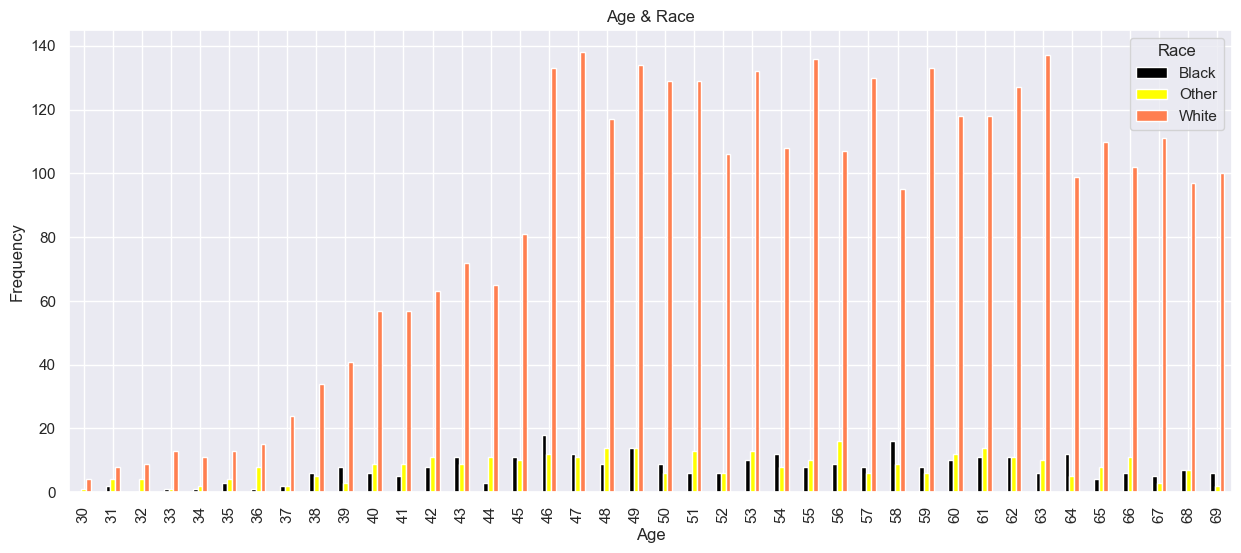

In [17]:
pd.crosstab(breast_cancer.Age, breast_cancer.Race).plot(kind = 'bar', figsize = (15, 6), color = [ 'black', 'yellow', 'coral'])
plt.title("Age & Race")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    In this dataset, the white race and others are found in all age categories.
    The black race has been sick since the age of 31. 

In [18]:
breast_cancer['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

### Race Vs 6th Stage

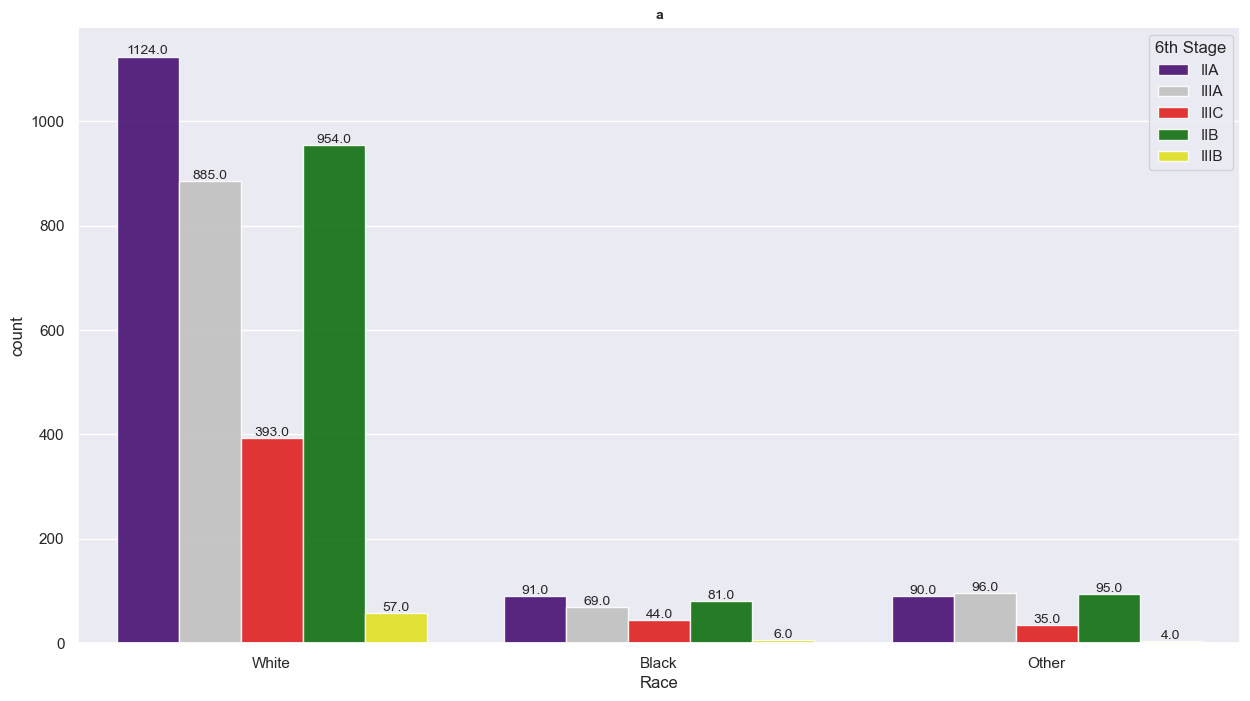

In [19]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('a', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Race', hue = '6th Stage', data = breast_cancer, palette = ['indigo', 'silver', 'red', 'green', 'yellow'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    1. All stages (which are represented in this dataset 'IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB') of breast cancer are more common in the white race. 
    2. In the black race and others, advanced forms IIIB and IIIC are rare. 
    

### Race Vs Status

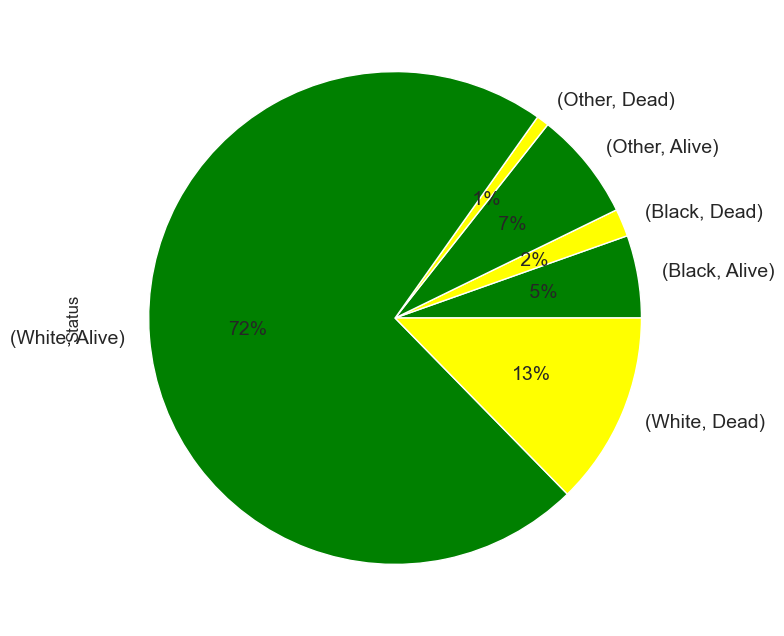

In [20]:
breast_cancer.groupby('Race')['Status'].value_counts().plot.pie(textprops={'fontsize': 14}, autopct='%2.0f%%',
                                                     colors= ('green', 'yellow'))                                                                                                   
plt.show()

    In the white race, 13% died of breast cancer, 72% are alive.
    Among the black race, 2% died, 5% are alive.
    For others, 1% died, 7% are alive.

### Marital Status Vs 6th Stage

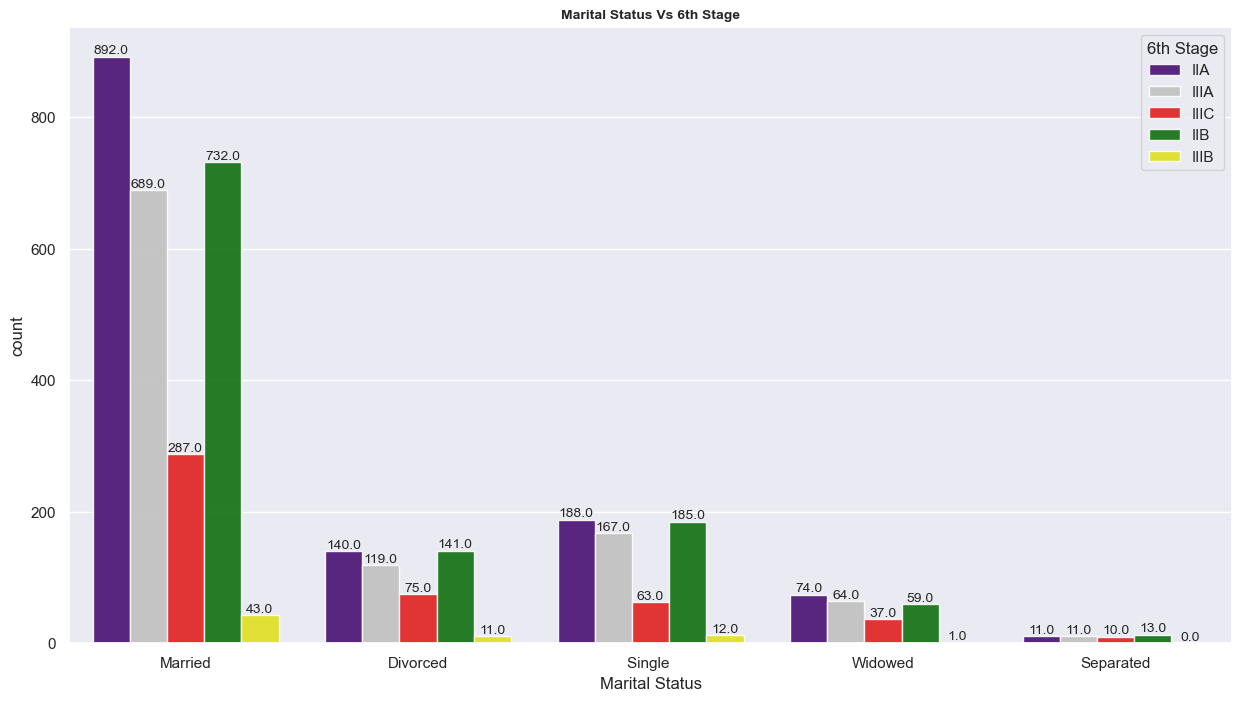

In [21]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Marital Status Vs 6th Stage', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Marital Status', hue = '6th Stage', data = breast_cancer, palette = ['indigo', 'silver', 'red', 'green', 'yellow'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Initial stages IIA, IIB are more common than others regardless of marital status 

### Grade or differentiate            
    The degree of differentiation of the tumor is indicated by the letter G(Grade).
    There are several degrees
    Gx – the degree of differentiation cannot be determined.
    G1 is a highly differentiated tumor (low grade of malignancy).
    G2 is a moderately differentiated tumor (medium grade of malignancy).
    G3 is a low–differentiated tumor (high grade of malignancy).
    G4 is an undifferentiated tumor (high grade of malignancy or anaplastic).

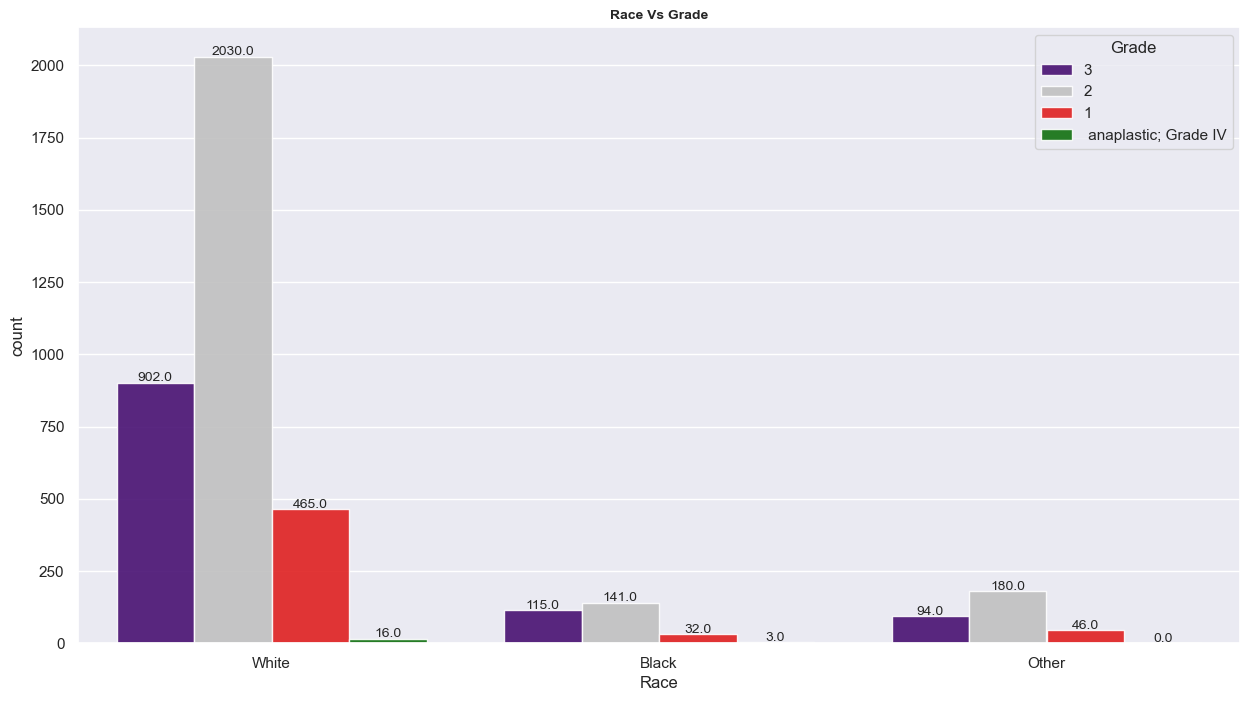

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Race Vs Grade', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Race', hue = 'Grade', data = breast_cancer, palette = ['indigo', 'silver', 'red', 'green', 'yellow'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Grade 2 is more common in all races. 
    Grade 4 is only 3% common in the black race.
    None of the others

### Age & Grade

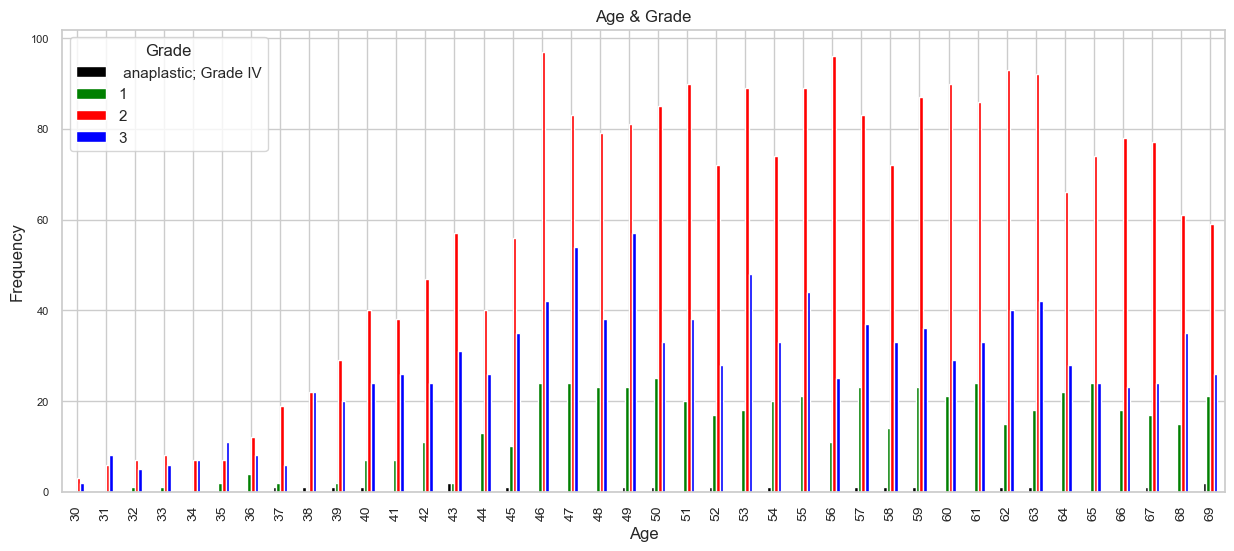

In [67]:
pd.crosstab(breast_cancer.Age, breast_cancer.Grade).plot(kind = 'bar', figsize = (15, 6), color = [ 'black', 'green', 'red', 'blue'])
plt.title("Age & Grade")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Grade 2 moderate form is prevalent at all ages 
    Aggressive form of breast cancer (Grade 3) occurs from age 30 years. 
    Grade 1 highly differentiated form from age 32. 
    Grade 4 anaplastic form from age 37. 

### Age & 6th Stage

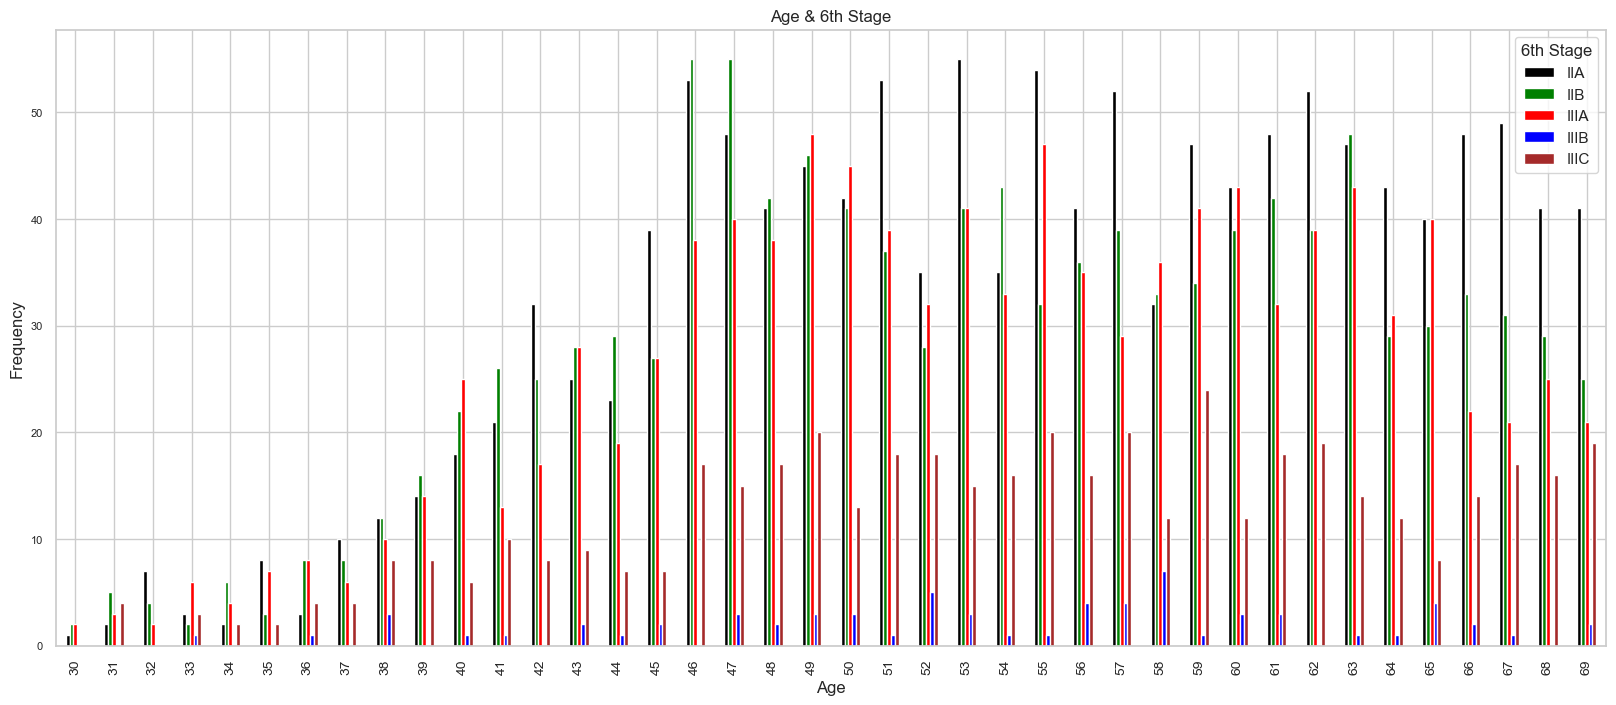

In [66]:
pd.crosstab(breast_cancer.Age, breast_cancer['6th Stage']).plot(kind = 'bar', figsize = (20, 8), color = [ 'black', 'green', 'red', 'blue', 'brown'])
plt.title("Age & 6th Stage")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Initial forms of cancer and stage IIIA are more common at all ages 
    Advanced forms IIIС occurs from 31 years of age, IIIB from 33 years of age. 

In [25]:
breast_cancer['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

### A Stage
    Regional - stages I through III 
    Distant - Stage IV , has distant metastases to other organs  

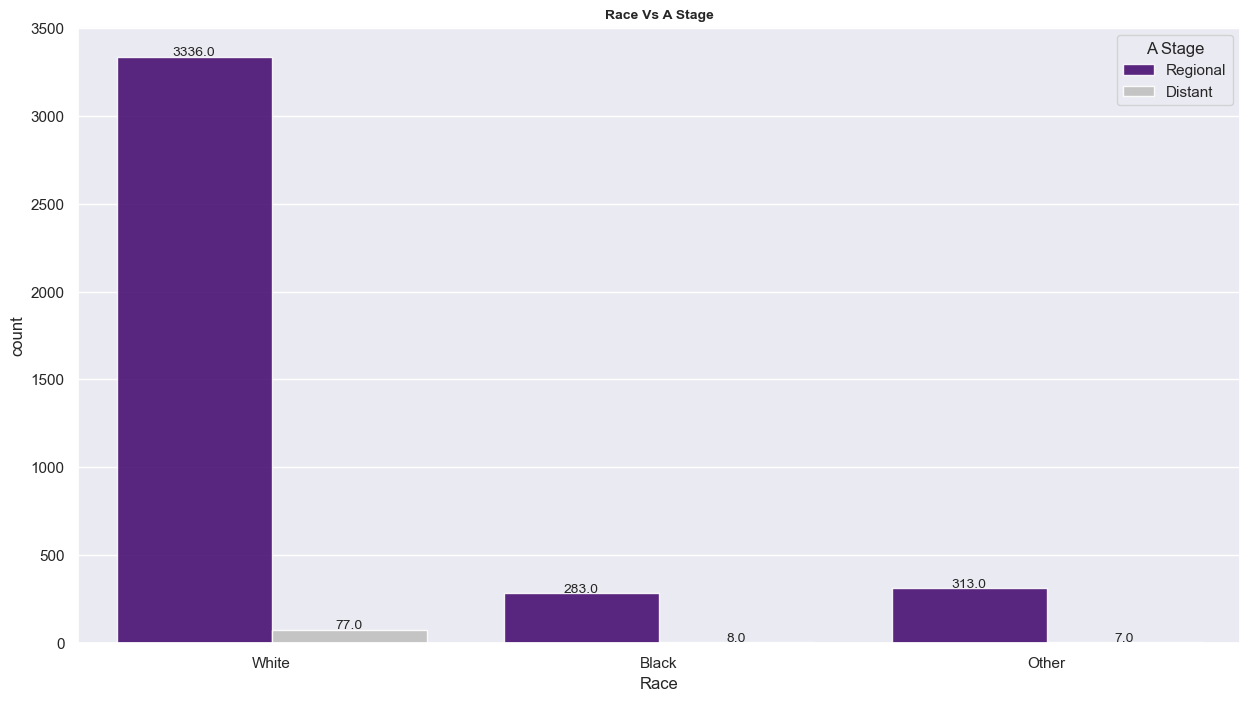

In [26]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Race Vs A Stage', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Race', hue = 'A Stage', data = breast_cancer, palette = ['indigo', 'silver'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    In this dataset, all races are dominated by Regional.
    The 4 stages,Distant,  are rare

### Estrogen Status Vs Progesterone Status

    Hormone receptors are proteins found inside some tumor cells. According to the hormonal status, negative and positive tumors are distinguished:

    Hormone receptor negative cancer is defined as estrogen receptor negative (ER status negative) and progesterone receptor negative (PR status negative)

    Hormone receptor positive cancer , both estrogen receptor positive (ER status positive) and progesterone receptor positive(PR status positive)
    
    
    Breast cancer is divided into several molecular subtypes due to its receptor status: 
             Luminal A - Estrogen receptor positive
                         Progesterone receptor positive in at least 20% of cases
                         HER2 negative
                         Low Ki-67
             
             Luminal B - Estrogen receptor positive
                         Progesterone receptor positive in less than 20% of cases
                         HER2 positive or high Ki-67
             
             ERBB2/HER2-amplified - HER2 positive
                                    Estrogen and progesterone receptor negative
 
             Basal-like - HER2, estrogen and progesterone receptor negative

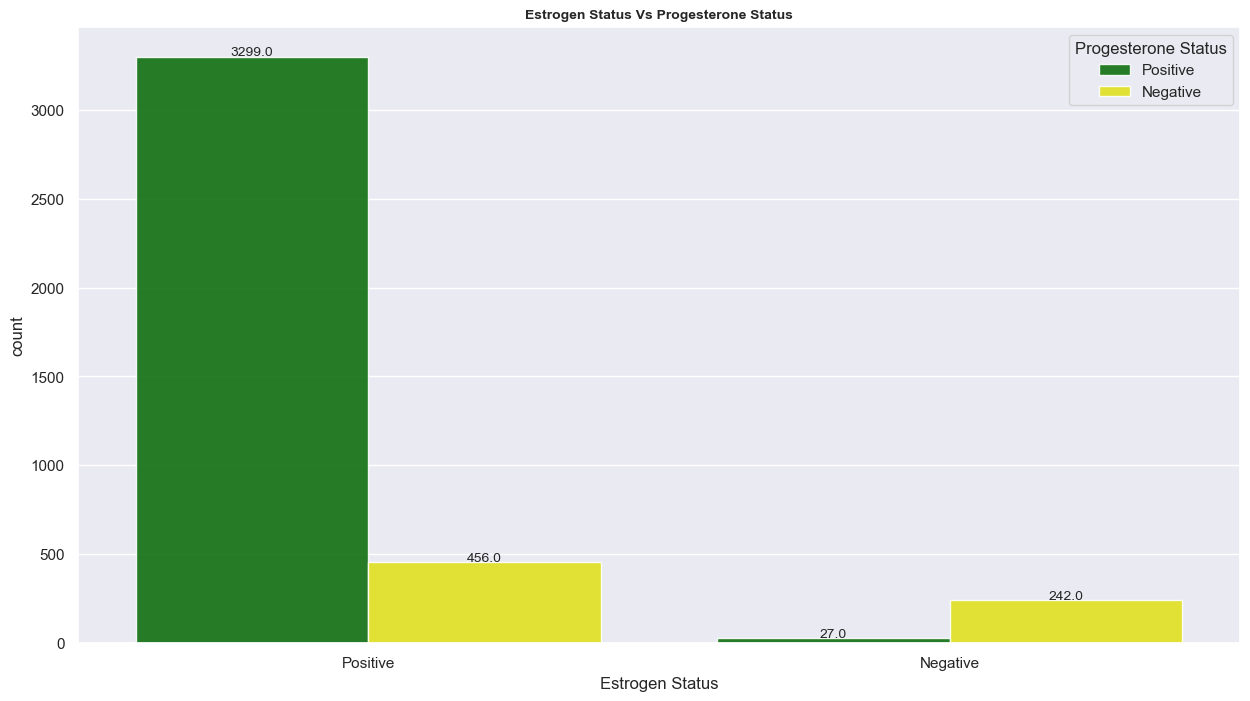

In [27]:
plt.figure(figsize=(15, 8))
plt.subplot()
plt.title('Estrogen Status Vs Progesterone Status', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'Estrogen Status', hue = 'Progesterone Status', data = breast_cancer, palette = ['green', 'yellow'],  alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

    Positive receptor status, most likely Luminal A and B, occurs in this dataset. 

In [28]:
subtype = breast_cancer.groupby(['Estrogen Status','Progesterone Status']).size().unstack()
subtype

Progesterone Status  Negative  Positive
Estrogen Status                        
Negative                  242        27
Positive                  456      3299

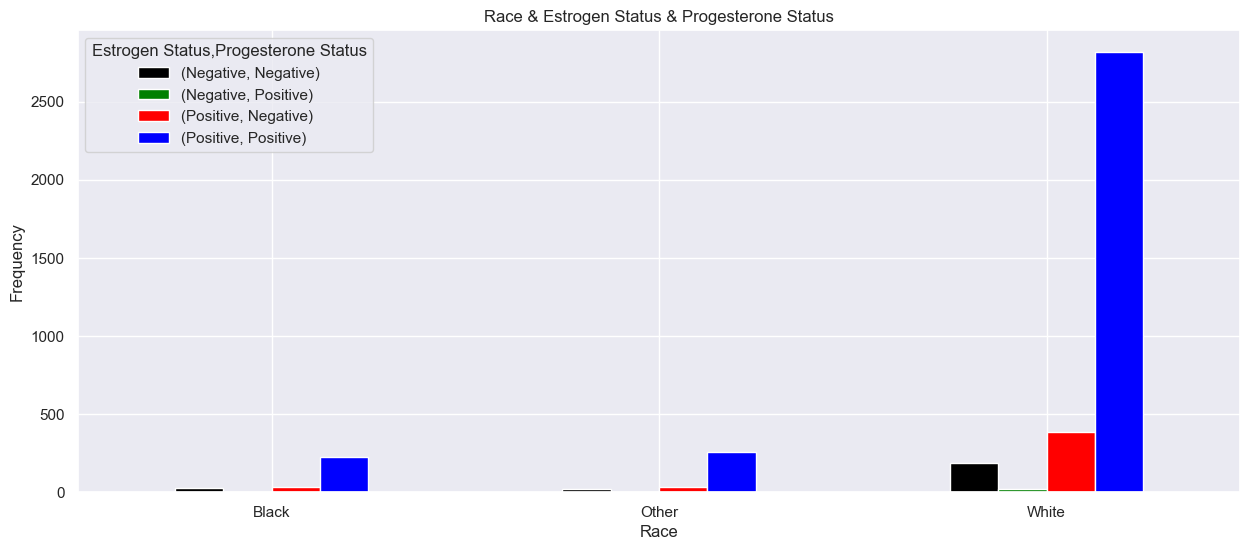

In [29]:
pd.crosstab(breast_cancer.Race, [breast_cancer['Estrogen Status'], breast_cancer['Progesterone Status']]).plot(kind = 'bar', figsize = (15, 6), color = [ 'black', 'green', 'red', 'blue'])
plt.title('Race & Estrogen Status & Progesterone Status')
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)          
plt.show()

     Positive hormone receptor status is found in every race. 
     Negative statuses are rare in blacks and others 

### Survival Months

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

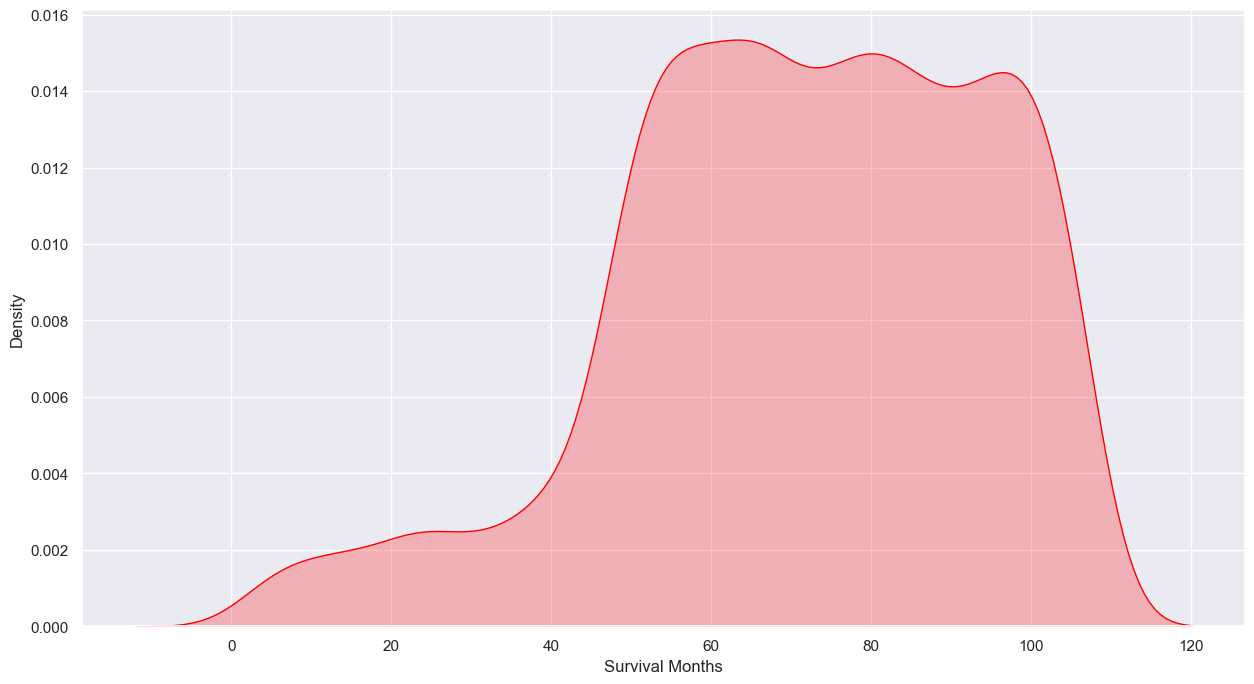

In [30]:
sns.kdeplot(breast_cancer['Survival Months'], label = ['Survival Months'], fill = True, color = 'red')

      Patients diagnosed with breast cancer live an average of 40 to 110 months. 

### Survival Months & 6th Stage & Status

<AxesSubplot:xlabel='6th Stage', ylabel='Survival Months'>

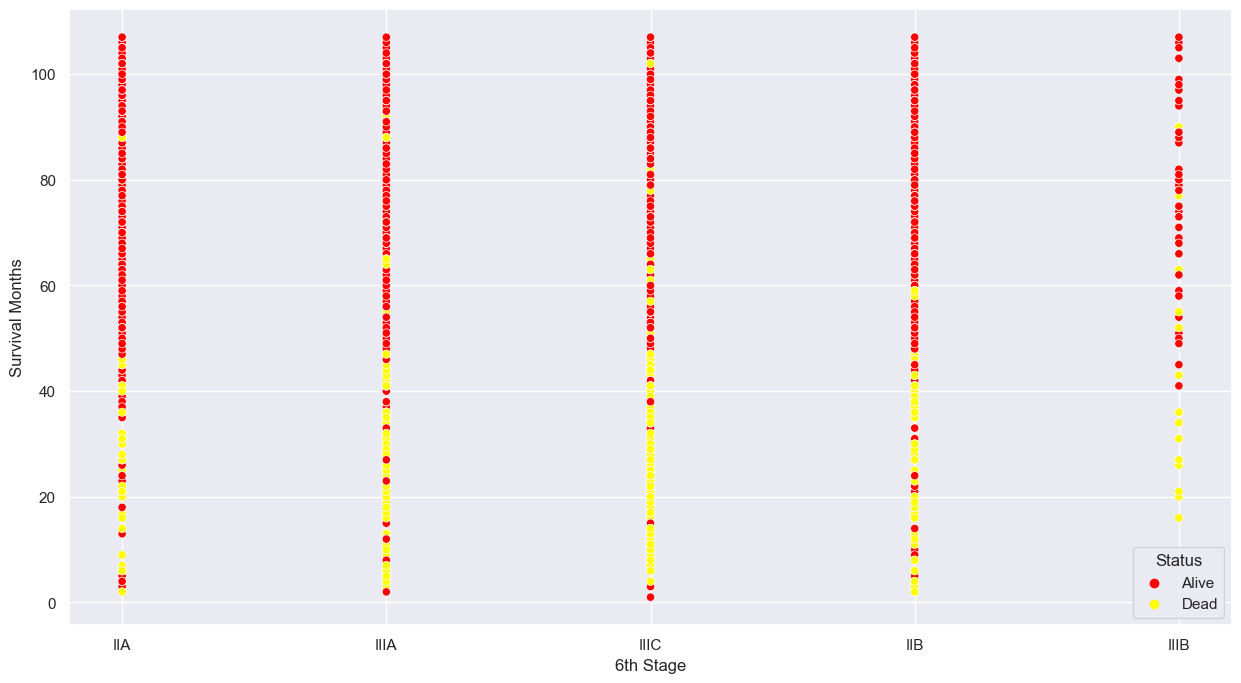

In [31]:
sns.scatterplot(x = breast_cancer['6th Stage'], y = breast_cancer['Survival Months'], hue = breast_cancer['Status'], palette = ['red', 'yellow'])

    
     Breast cancer mortality.
     They die after an average of 40 months (3 years 4 months), regardless of the stage of the disease. 
     In stage IIIB, they die after 35 months.

### Survival Months & Grade & Status

C:\Users\User\AppData\Local\Temp\ipykernel_2844\2584389615.py:1: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



<AxesSubplot:xlabel='Grade', ylabel='Survival Months'>

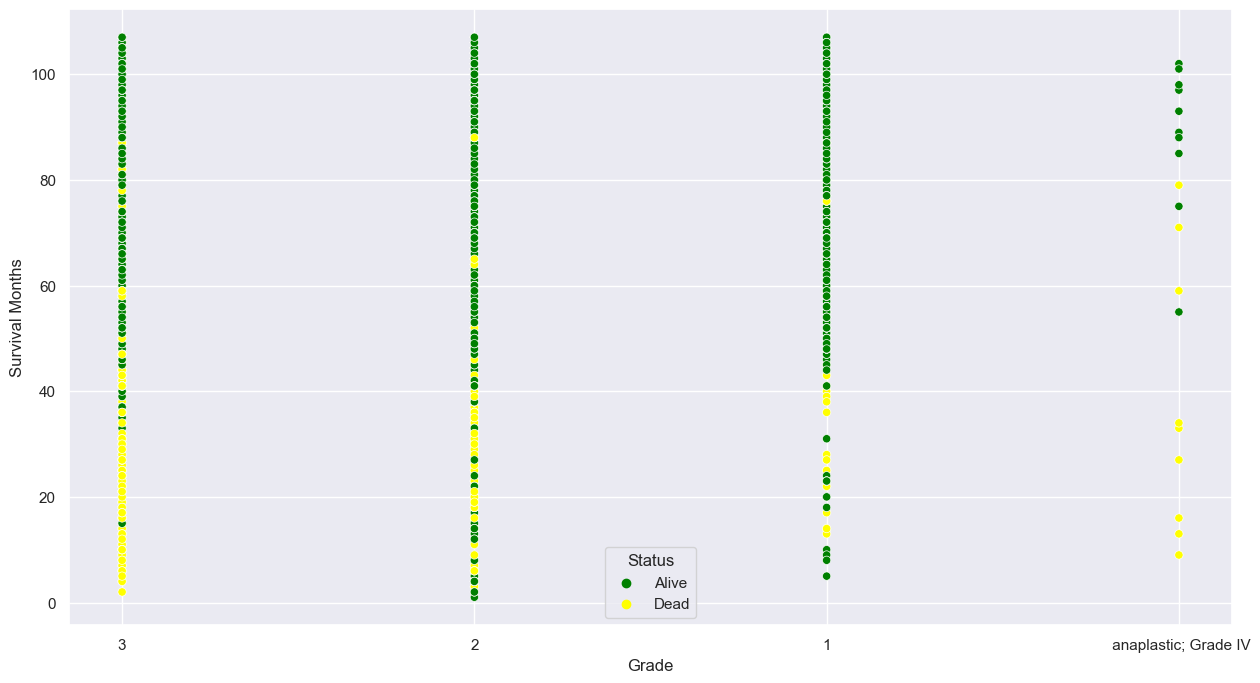

In [32]:
sns.scatterplot(x = breast_cancer['Grade'], y = breast_cancer['Survival Months'], hue = breast_cancer['Status'], palette = ['green', 'yellow', 'red', 'blue'])

    Patients who have lived on average up to 40 months die more often from Grade 3, 4
    Grade 1, 2 live relatively long regardless of the stage.

### Survival Months & Race & Status 

<AxesSubplot:xlabel='Race', ylabel='Survival Months'>

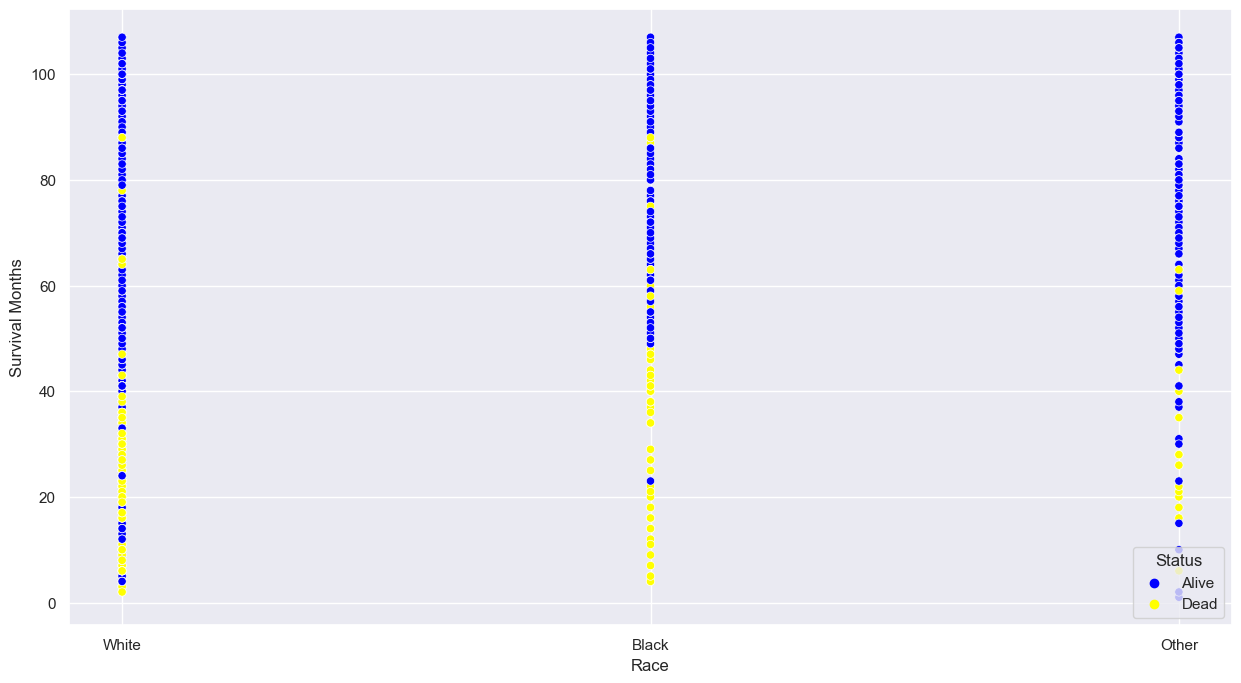

In [33]:
sns.scatterplot(x = breast_cancer['Race'], y = breast_cancer['Survival Months'], hue = breast_cancer['Status'], palette = ['blue', 'yellow'])

    In this dataset : 
         1. the white race die of breast cancer after living up to 40 months.
         2. Black race die after living up to 50 months. 
         3. Others die before 30 months. 
    Why so few? Because this dataset represents many whites than others and blacks. 

### Survival Months & Age & Status

<AxesSubplot:xlabel='Age', ylabel='Survival Months'>

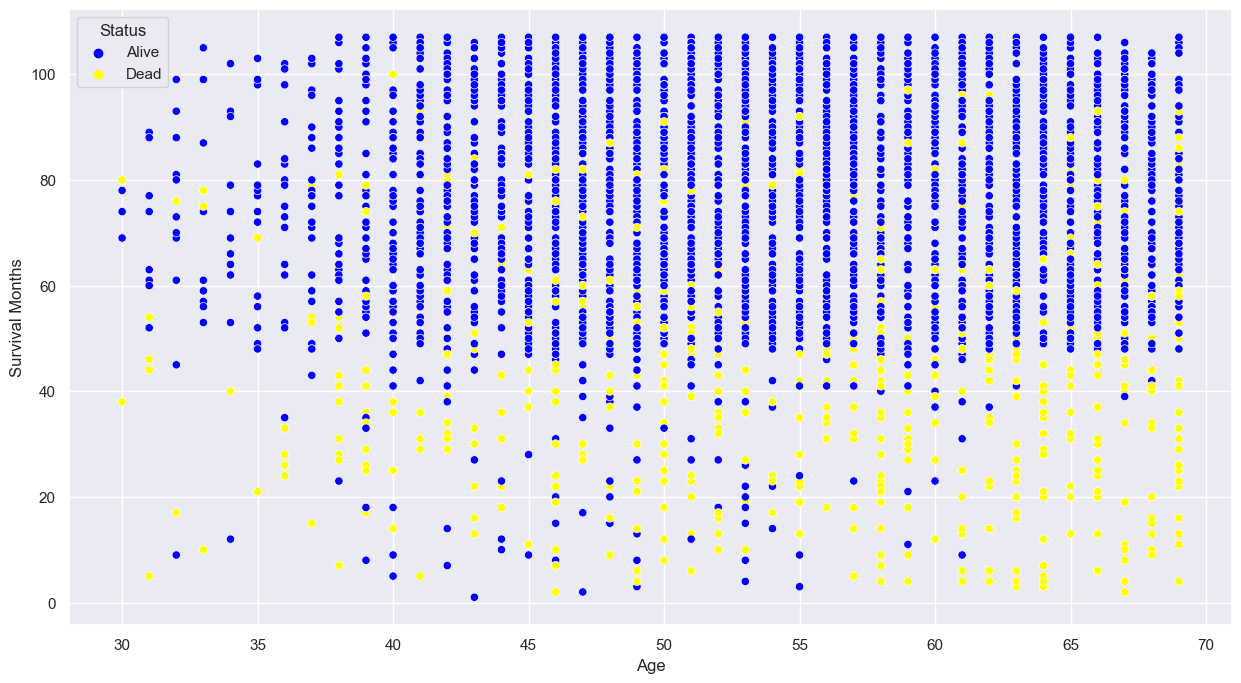

In [34]:
sns.scatterplot(x = breast_cancer['Age'], y = breast_cancer['Survival Months'], hue = breast_cancer['Status'], palette = ['blue', 'yellow'])

     from 30 to 70 years of age day of breast cancer after living the first 40 months. 
     Why do they live so little? Because at a young age there is an aggressive form of breast cancer, the survival rate is minimal. Older age has many others diagnosis

### Regional Node Examined & Reginol Node Positive

    Surgical treatment of breast cancer includes mastectomy and lymphodissection. After that, it is sent for histologic examination. 
    Microscopically examine the material and count how many lymph nodes are found and how many of them have metastasis. 
    Reginol Node Positive - lymph nodes that have metastasis (positive).
    Regional Node Examined - how many lymph nodes are examined in the material. 

Text(0.5, 1.0, 'Reginol Node Positive')

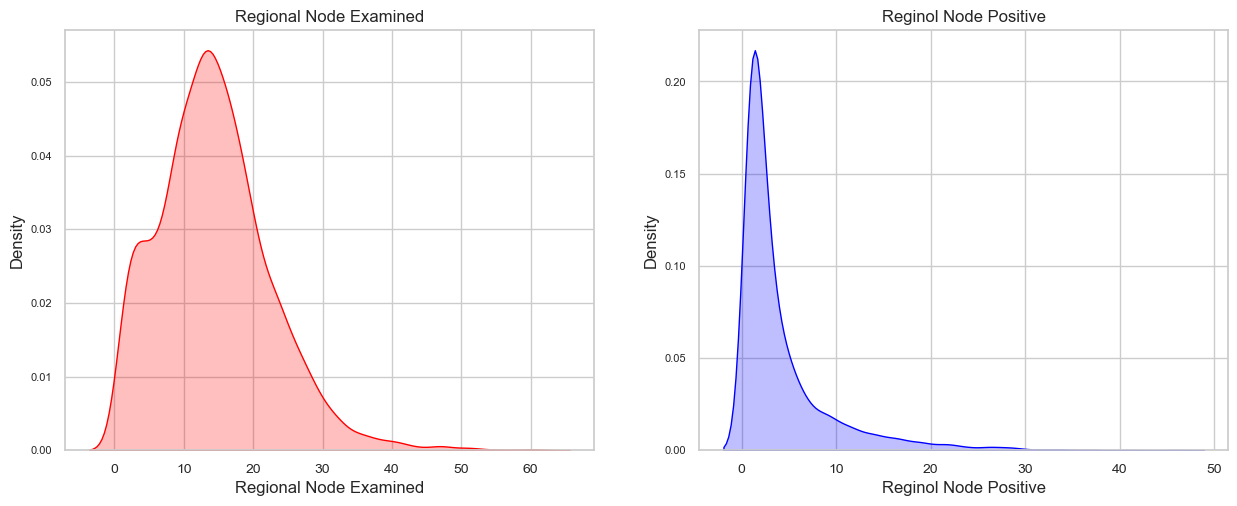

In [64]:
plt.figure(figsize=(15,12))

plt.subplot(221)
sns.kdeplot(breast_cancer['Regional Node Examined'], label = ['Regional Node Examined'], fill = True, color = 'red')
plt.title('Regional Node Examined')

plt.subplot(222)
sns.kdeplot(breast_cancer['Reginol Node Positive'], label = ['Reginol Node Positive'], fill = True, color = 'blue')
plt.title('Reginol Node Positive')

    about 60 lymph nodes were examined, of which about 50 lymph nodes have metastasis.

<AxesSubplot:xlabel='Regional Node Examined', ylabel='Reginol Node Positive'>

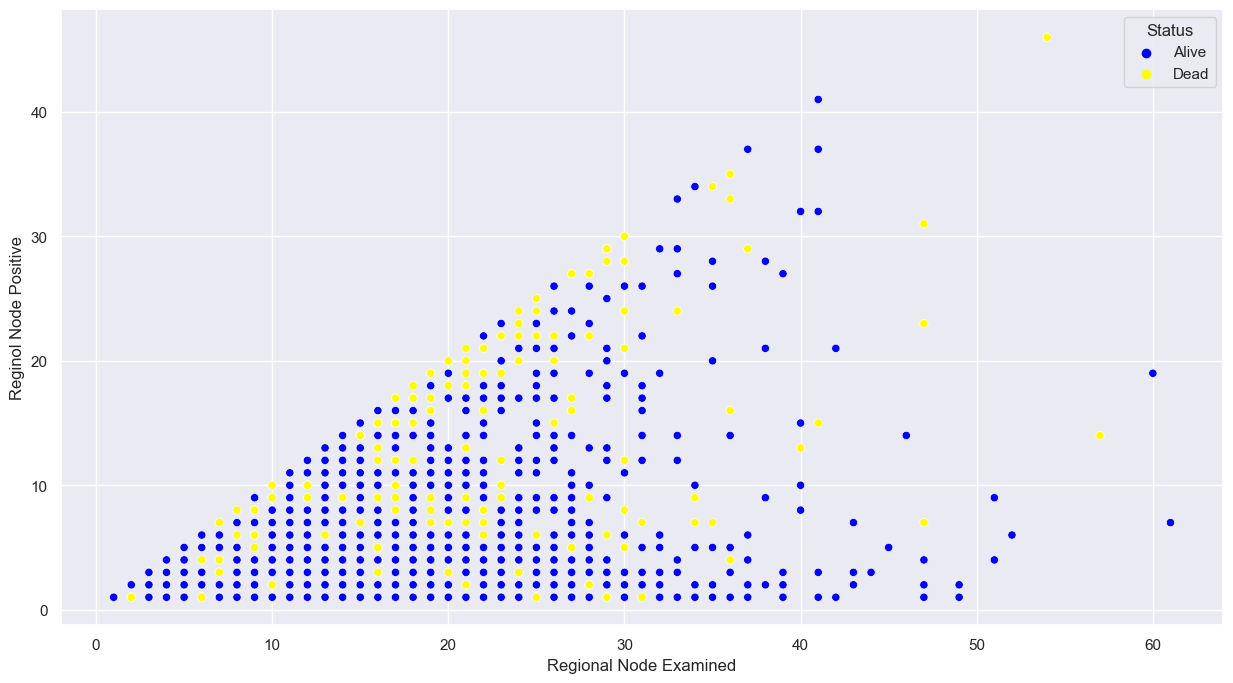

In [35]:
sns.scatterplot(x = breast_cancer['Regional Node Examined'], y = breast_cancer['Reginol Node Positive'], hue = breast_cancer['Status'], palette = ['blue', 'yellow'])

    Why patients with breast cancer with metastases in less than 5 limofusals die, most likely have an aggressive form of cancer or old age. 

### Regional Node Examined & Reginol Node Positive & Race

<AxesSubplot:xlabel='Regional Node Examined', ylabel='Reginol Node Positive'>

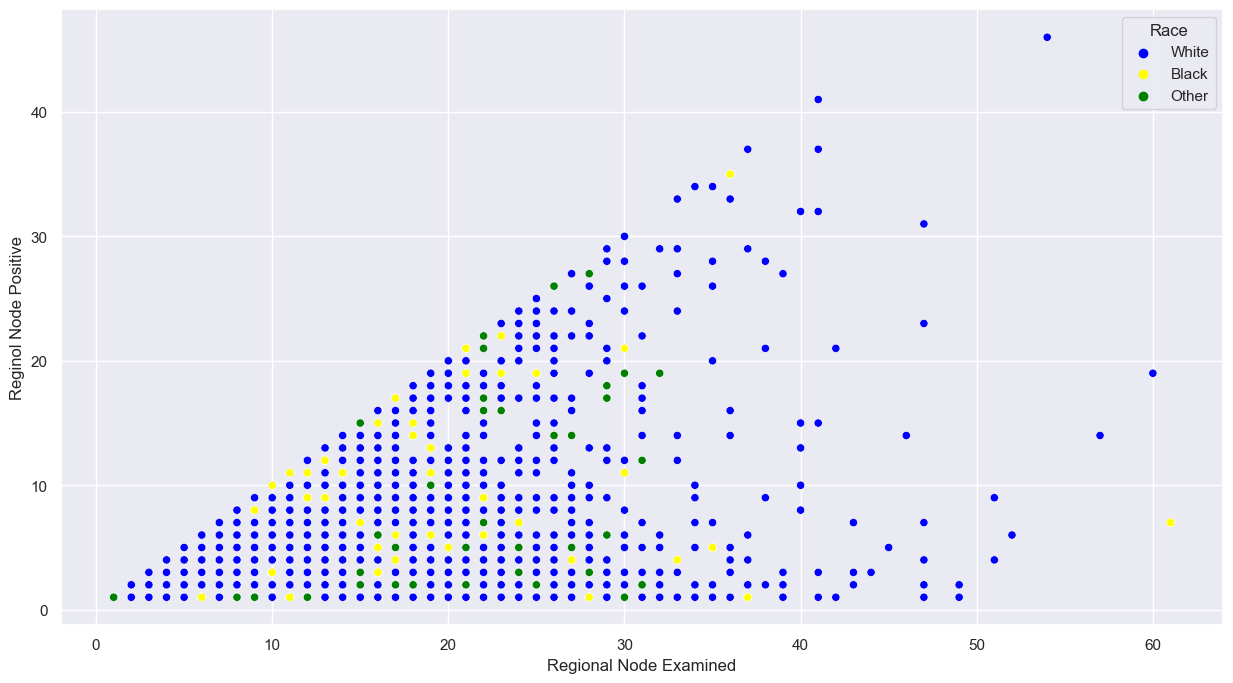

In [37]:
sns.scatterplot(x = breast_cancer['Regional Node Examined'], y = breast_cancer['Reginol Node Positive'], hue = breast_cancer['Race'],  palette = ['blue', 'yellow', 'green'])

    The black race has metastases to lymph nodes up to 25 l.u. 
    Others have up to 30 lymph node metastases. 
    White race predominates 

## STEP 4: Feature engineering 
### replace 


In [39]:
breast_cancer.Status.replace({"Dead":1,"Alive":0}, inplace=True)
breast_cancer['Estrogen Status'].replace({"Negative":0,"Positive": 1}, inplace=True)
breast_cancer['Progesterone Status'].replace({'Positive': 1, 'Negative': 0}, inplace = True)
breast_cancer['A Stage'].replace({'Regional': 0, 'Distant': 1}, inplace = True)

In [40]:
breast_cancer

Age   Race Marital Status T Stage  N Stage 6th Stage Grade  A Stage  \
0      68  White        Married       T1      N1       IIA     3        0   
1      50  White        Married       T2      N2      IIIA     2        0   
2      58  White       Divorced       T3      N3      IIIC     2        0   
3      58  White        Married       T1      N1       IIA     3        0   
4      47  White        Married       T2      N1       IIB     3        0   
...   ...    ...            ...      ...     ...       ...   ...      ...   
4019   62  Other        Married       T1      N1       IIA     2        0   
4020   56  White       Divorced       T2      N2      IIIA     2        0   
4021   68  White        Married       T2      N1       IIB     2        0   
4022   58  Black       Divorced       T2      N1       IIB     2        0   
4023   46  White        Married       T2      N1       IIB     2        0   

      Tumor Size  Estrogen Status  Progesterone Status  \
0              4                1                    1   
1             35                1                    1   
2             63                1                    1   
3             18                1                    1   
4             41                1                    1   
...          ...              ...                  ...   
4019           9                1                    1   
4020          46                1                    1   
4021          22                1                    0   
4022          44                1                    1   
4023          30                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                         24                      1               60       0  
1                         14                      5               62       0  
2                         14                      7               75       0  
3                          2                      1               84       0  
4                          3                      1               50       0  
...                      ...                    ...              ...     ...  
4019                       1                      1               49       0  
4020                      14                      8               69       0  
4021                      11                      3               69       0  
4022                      11                      1               72       0  
4023                       7                      2              100       0  

[4024 rows x 15 columns]

In [41]:
categorical = [var for var in breast_cancer.columns if breast_cancer[var].dtype == 'O' and var != 'Status']
print("There are {} categorical variables".format(len(categorical)))

There are 6 categorical variables


In [42]:
categorical

['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade']

In [43]:
numerical = [var for var in breast_cancer.columns if breast_cancer[var].dtype != 'O' and var != 'Status']
print('There are {} numerical variables'.format(len(numerical)))

There are 8 numerical variables


In [44]:
numerical

['Age',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

In [45]:
def diagnostic_plots(df, variable):
    fig = plt.figure(figsize = (18, 5))
   
    plt.subplot(1, 3, 1)
    fig = df[variable].hist(bins = 30)
    fig.set_ylabel ('Count')
    fig.set_xlabel(variable)

    plt.subplot(1, 3, 2)
    stats.probplot(x = df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    fig = df.boxplot(column = variable)
    fig.set_title('Box-plot')
    fig.set_ylabel(variable)

    plt.show()

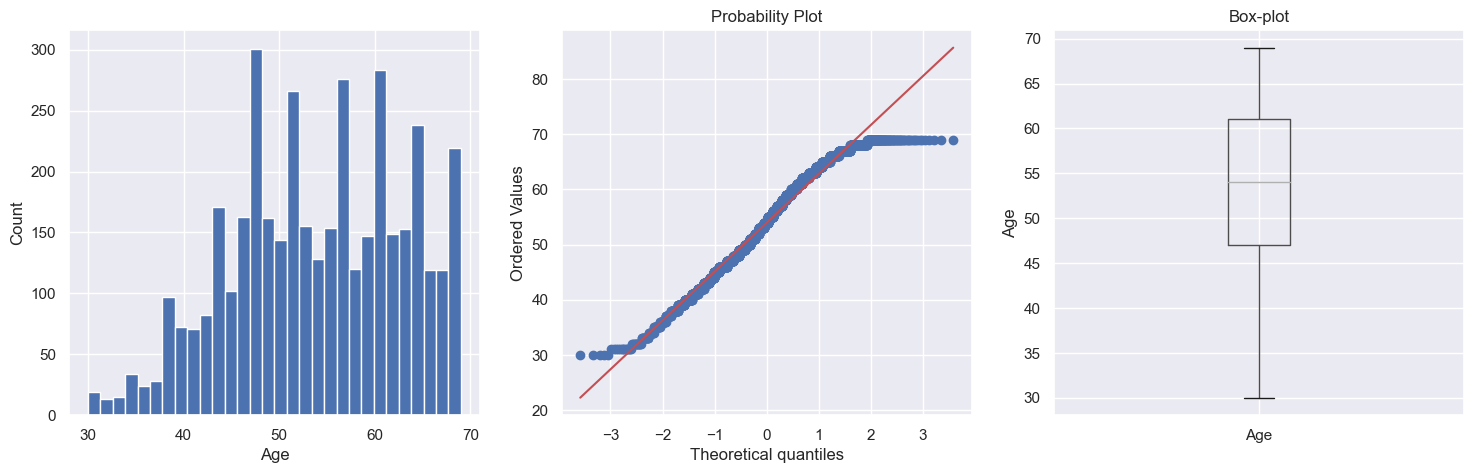

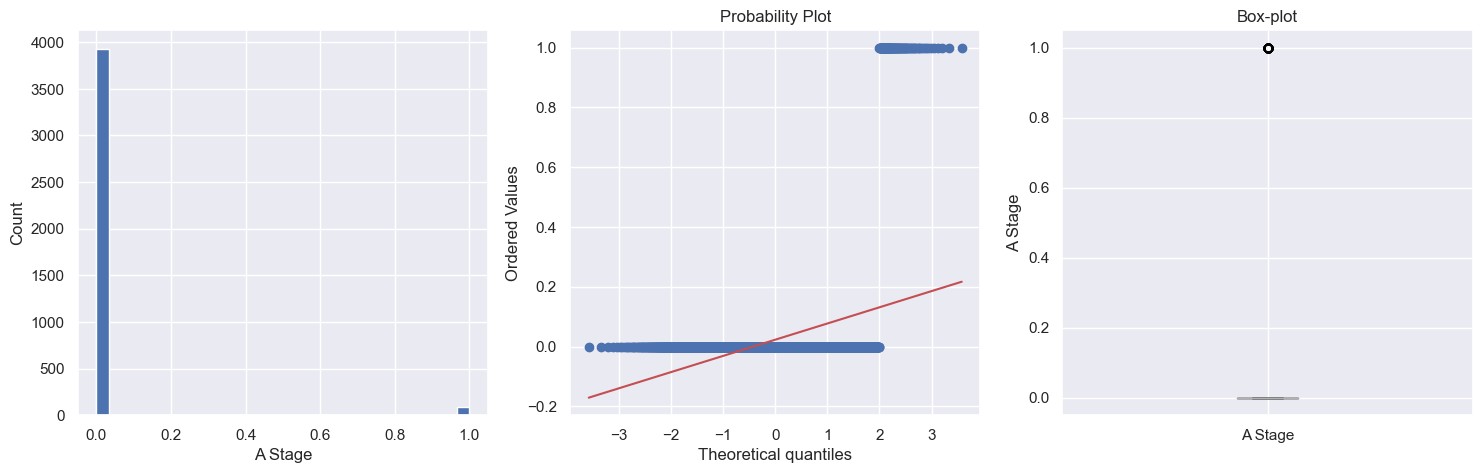

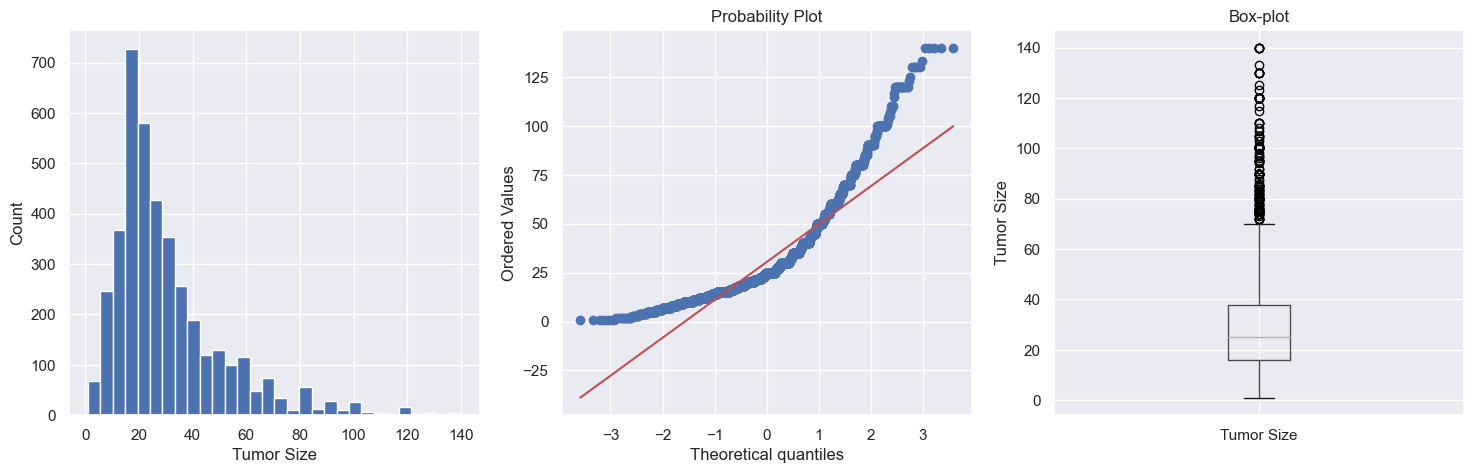

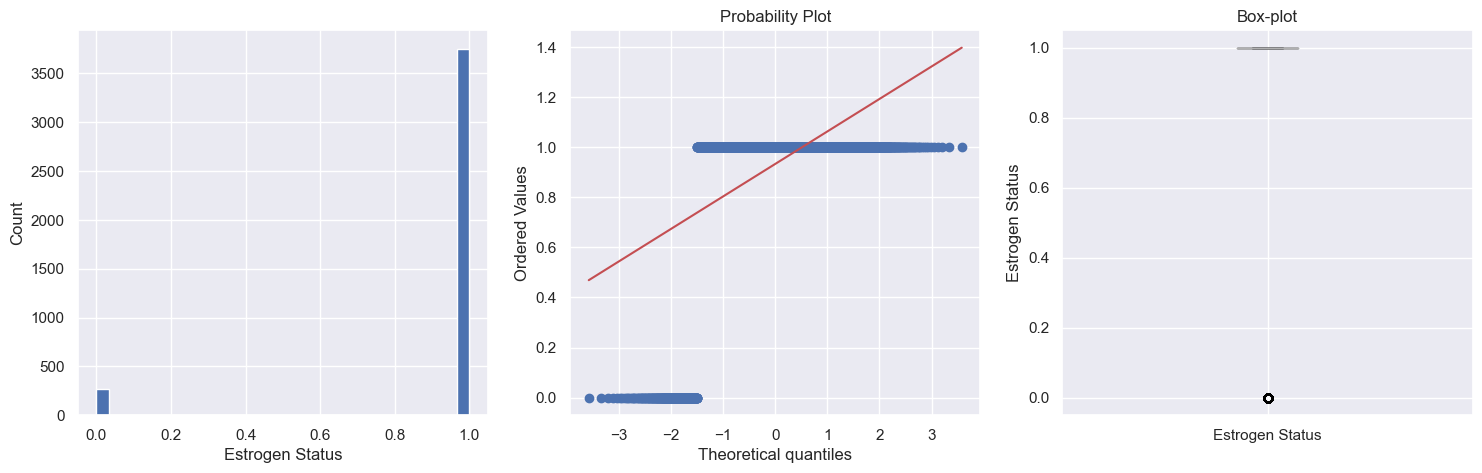

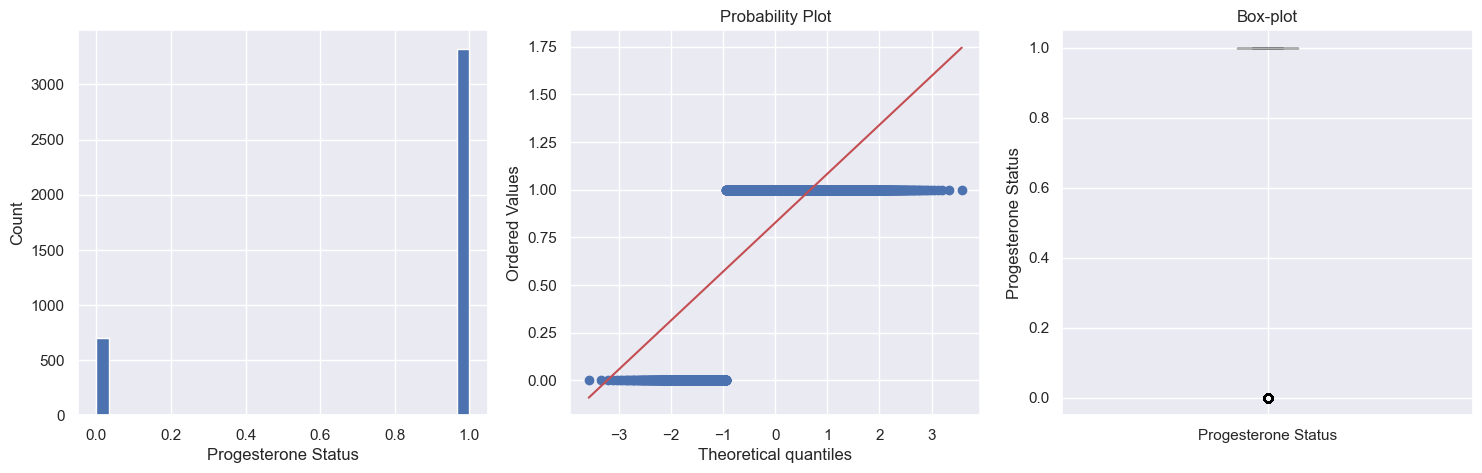

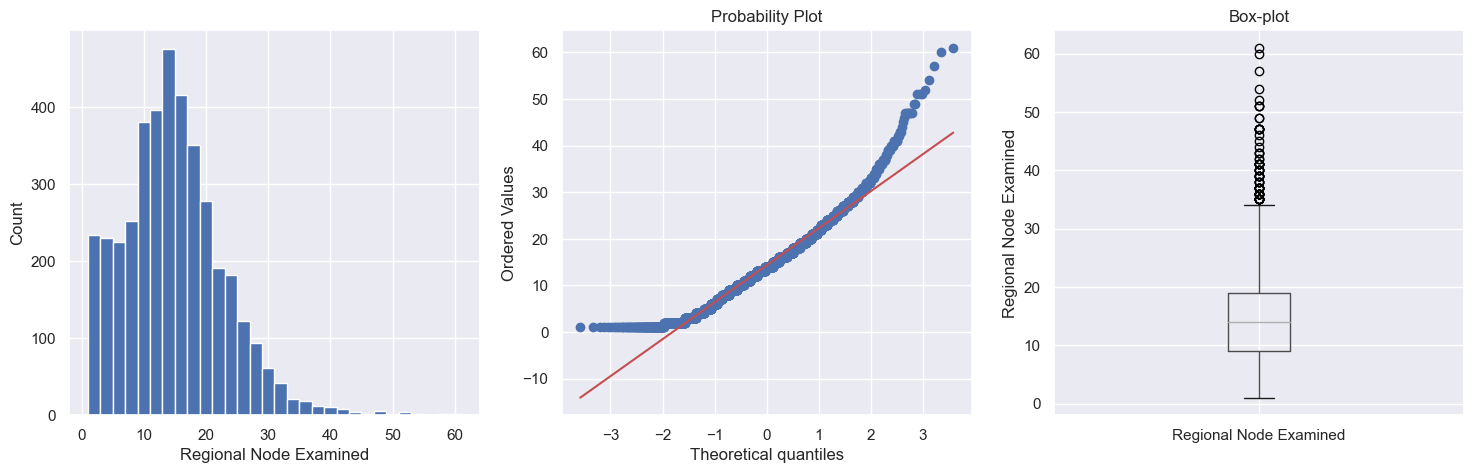

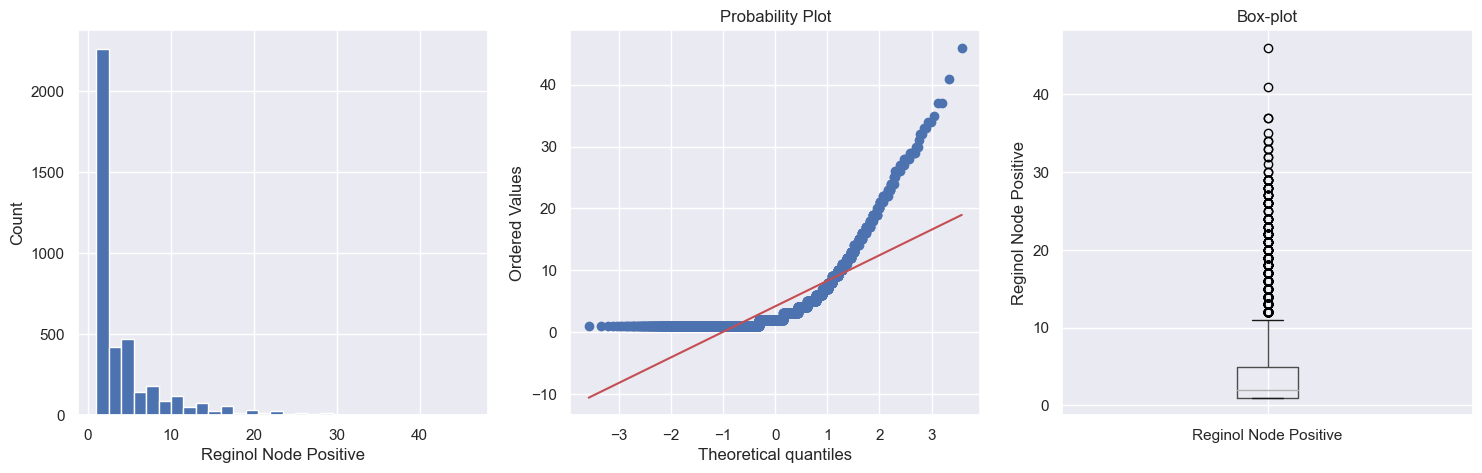

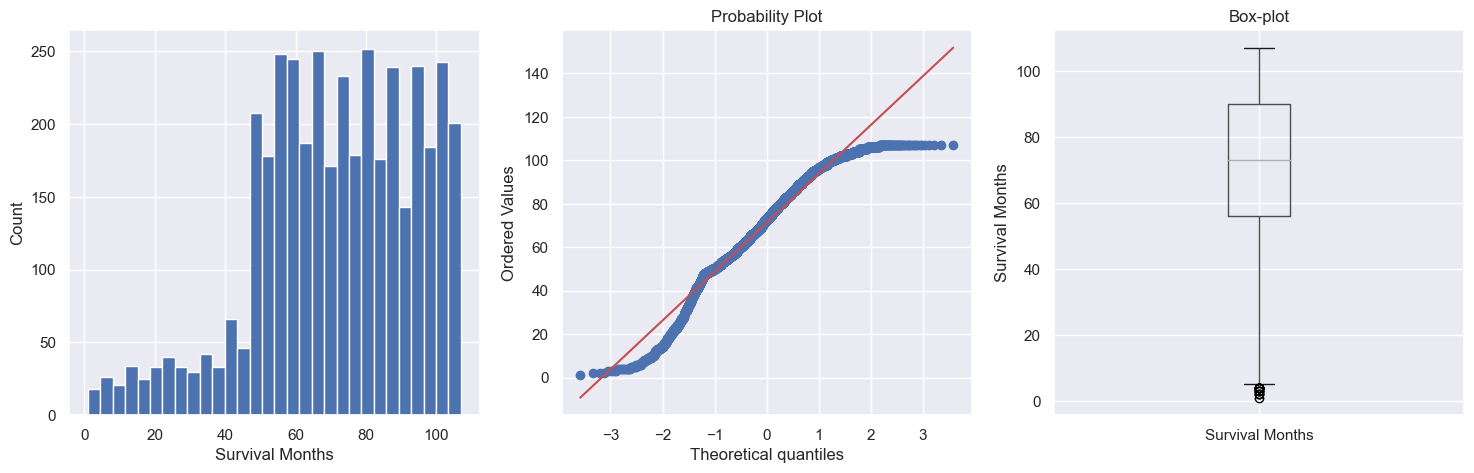

In [46]:
for var in numerical:
    diagnostic_plots(breast_cancer, var)

In [47]:
correlation = breast_cancer.corr()
correlation

Age   A Stage  Tumor Size  Estrogen Status  \
Age                     1.000000 -0.020860   -0.077215         0.059787   
A Stage                -0.020860  1.000000    0.123883        -0.065570   
Tumor Size             -0.077215  0.123883    1.000000        -0.059585   
Estrogen Status         0.059787 -0.065570   -0.059585         1.000000   
Progesterone Status    -0.021269 -0.026530   -0.069879         0.513308   
Regional Node Examined -0.033345  0.069010    0.104352        -0.044836   
Reginol Node Positive   0.012586  0.232849    0.242322        -0.085985   
Survival Months        -0.009390 -0.070109   -0.086901         0.128469   
Status                  0.055921  0.096584    0.134205        -0.184650   

                        Progesterone Status  Regional Node Examined  \
Age                               -0.021269               -0.033345   
A Stage                           -0.026530                0.069010   
Tumor Size                        -0.069879                0.104352   
Estrogen Status                    0.513308               -0.044836   
Progesterone Status                1.000000               -0.018051   
Regional Node Examined            -0.018051                1.000000   
Reginol Node Positive             -0.078069                0.411580   
Survival Months                    0.096018               -0.022054   
Status                            -0.177079                0.034772   

                        Reginol Node Positive  Survival Months    Status  
Age                                  0.012586        -0.009390  0.055921  
A Stage                              0.232849        -0.070109  0.096584  
Tumor Size                           0.242322        -0.086901  0.134205  
Estrogen Status                     -0.085985         0.128469 -0.184650  
Progesterone Status                 -0.078069         0.096018 -0.177079  
Regional Node Examined               0.411580        -0.022054  0.034772  
Reginol Node Positive                1.000000        -0.135214  0.256638  
Survival Months                     -0.135214         1.000000 -0.476514  
Status                               0.256638        -0.476514  1.000000

In [48]:
corr = breast_cancer.corr()
fig = px.imshow(corr, text_auto = True, width=1000, height=  1000)
fig.show()

### Split dataset

In [49]:
X = breast_cancer.drop('Status', axis = 1)
y = breast_cancer['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((3219, 14), (805, 14))

### Categorical encoding - Label encoding 

In [50]:
encoder = LabelEncoder()
for i in categorical:
    X_train[i] = encoder.fit_transform(X_train[i])
    X_test[i] = encoder.transform(X_test[i])

In [74]:
X_train

Age  Race  Marital Status  T Stage   N Stage  6th Stage  Grade  A Stage  \
3095   52     2               1         0        1          2      3        0   
3274   55     2               1         0        1          2      2        0   
553    49     2               1         0        1          2      3        0   
2868   48     2               1         0        0          0      1        0   
1771   53     2               1         1        0          1      1        0   
...   ...   ...             ...       ...      ...        ...    ...      ...   
835    64     1               1         1        0          1      2        0   
3264   53     2               1         1        0          1      1        0   
1653   45     2               3         1        0          1      2        0   
2607   41     2               3         1        1          2      3        0   
2732   48     2               1         1        0          1      2        0   

      Tumor Size  Estrogen Status  Progesterone Status  \
3095          20                0                    0   
3274          18                1                    0   
553           11                1                    1   
2868          12                1                    1   
1771          25                1                    1   
...          ...              ...                  ...   
835           30                1                    1   
3264          40                1                    1   
1653          22                1                    1   
2607          28                1                    1   
2732          23                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  
3095                      17                      8               10  
3274                      15                      6               99  
553                       17                      4              100  
2868                       8                      1               49  
1771                      23                      2              100  
...                      ...                    ...              ...  
835                       23                      1               53  
3264                      26                      2               65  
1653                       8                      1               49  
2607                      36                      4               29  
2732                      15                      1               49  

[3219 rows x 14 columns]

### Standardisation

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LogisticRegression

In [53]:
lg = LogisticRegression(max_iter=100)
lg.fit(X_train_scaled, y_train)
y_pred_train_lg = lg.predict(X_train_scaled)
y_pred_test_lg = lg.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_lg))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_lg)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_lg))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_lg))
print('Testing precision score: ', precision_score(y_test, y_pred_test_lg))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_lg, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color ='RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  0.8974836905871388
Testing accuracy score:  0.893167701863354


Testing recall:  0.41935483870967744
Testing f1 score:  0.5473684210526315
Testing precision score:  0.7878787878787878


 ### SVC

In [54]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_train_svc = svc.predict(X_train_scaled)
y_pred_test_svc = svc.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_svc))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_svc)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_svc))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_svc))
print('Testing precision score: ', precision_score(y_test, y_pred_test_svc))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_svc, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color ='RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  0.9068033550792172
Testing accuracy score:  0.8906832298136645


Testing recall:  0.3467741935483871
Testing f1 score:  0.4942528735632184
Testing precision score:  0.86


### AdaBoostClassifier

In [55]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
y_pred_train_adaboost = adaboost.predict(X_train_scaled)
y_pred_test_adaboost = adaboost.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_adaboost))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_adaboost)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_adaboost))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_adaboost))
print('Testing precision score: ', precision_score(y_test, y_pred_test_adaboost))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_adaboost, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color ='RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  0.9099099099099099
Testing accuracy score:  0.8968944099378882


Testing recall:  0.5080645161290323
Testing f1 score:  0.6028708133971292
Testing precision score:  0.7411764705882353


### DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_dt))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_dt)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_dt))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_dt))
print('Testing precision score: ', precision_score(y_test, y_pred_test_dt))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_dt, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color ='RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  1.0
Testing accuracy score:  0.822360248447205


Testing recall:  0.45161290322580644
Testing f1 score:  0.43921568627450974
Testing precision score:  0.42748091603053434


### RandomForestClassifier

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_rf))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_rf)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_rf))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_rf))
print('Testing precision score: ', precision_score(y_test, y_pred_test_rf))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_rf, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color ='RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  0.9996893445169307
Testing accuracy score:  0.9006211180124224


Testing recall:  0.46774193548387094
Testing f1 score:  0.5918367346938775
Testing precision score:  0.8055555555555556


### GradientBoostingClassifier

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_train_gb = gb.predict(X_train_scaled)
y_pred_test_gb = gb.predict(X_test_scaled)
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_gb))
print('Testing accuracy score: ', accuracy_score(y_test, y_pred_test_gb)) 
print('\n')
print('Testing recall: ', recall_score(y_test, y_pred_test_gb))      
print('Testing f1 score: ', f1_score(y_test, y_pred_test_gb))
print('Testing precision score: ', precision_score(y_test, y_pred_test_gb))


fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_test_gb, normalize='true'),2), 
                text_auto = True, 
                aspect = "True",
                labels = dict(x = "Status", y = "Status", color = 'RdBu_r'),
                x = ['Alive', 'Dead'],
                y = ['Alive', 'Dead'])
fig.update_xaxes(side = "bottom")
fig.show()

Training accuracy score:  0.9294812053432743
Testing accuracy score:  0.901863354037267


Testing recall:  0.47580645161290325
Testing f1 score:  0.5989847715736041
Testing precision score:  0.8082191780821918


In [59]:
data_model = pd.DataFrame(data = {'Model': ['LogisticRegression', 'SVC', 'AdaBoostClassifier',
                                            'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'], 
                                  'Accuracy score': [accuracy_score(y_test, y_pred_test_lg),
                                            accuracy_score(y_test, y_pred_test_svc),
                                            accuracy_score(y_test, y_pred_test_adaboost),
                                            accuracy_score(y_test, y_pred_test_dt),
                                            accuracy_score(y_test, y_pred_test_rf),
                                            accuracy_score(y_test, y_pred_test_gb)]}).sort_values(by = 'Accuracy score', ascending = False)

fig = px.bar(data_model, x = 'Model', y='Accuracy score', text = 'Accuracy score', color = 'Model')

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=13, l=13, r=13, b=13))
fig.show()

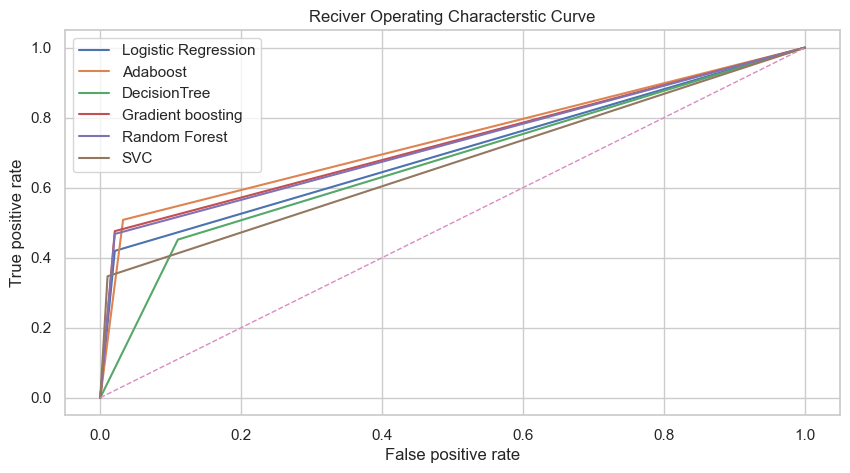

In [60]:
lg_false_positive_rate, lg_true_positive_rate, lg_threshold = roc_curve(y_test, y_pred_test_lg, pos_label= 1)
adaboost_false_positive_rate, adaboost_true_positive_rate,adaboost_threshold = roc_curve(y_test, y_pred_test_adaboost, pos_label= 1)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(y_test, y_pred_test_dt, pos_label= 1)                                                             
gb_false_positive_rate, gb_true_positive_rate, gb_threshold = roc_curve(y_test, y_pred_test_gb, pos_label= 1)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(y_test, y_pred_test_rf, pos_label= 1)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(y_test, y_pred_test_svc, pos_label= 1)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lg_false_positive_rate,lg_true_positive_rate,label='Logistic Regression')
plt.plot(adaboost_false_positive_rate, adaboost_true_positive_rate,label='Adaboost')
plt.plot(dt_false_positive_rate, dt_true_positive_rate,label='DecisionTree')
plt.plot(gb_false_positive_rate, gb_true_positive_rate,label='Gradient boosting')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='SVC')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

    For this unbalanced dataset, the AdaBoostClassifier models predict better: Train 0.90, Test 0.89
                                                                                recall score: 0.50
                                                                                f1 score: 0.602
                                                                                precision score: 0.74

    GradientBoostingClassifier is also good, even better than AdaBoostClassifier Train: 0.92, Test: 0.90 but  
                                                                                 recall score: 0.47, 
                                                                                 f1 score: 0.59
                                                                                 precision score: 0.80 lower than          AdaBoostClassifier, but not so critical. 

    RandomForestClassifier, DecisionTreeClassifier is very much overfitting. 

    LogisticRegression', 'SVC' predicts very weakly. 

### Feature importances

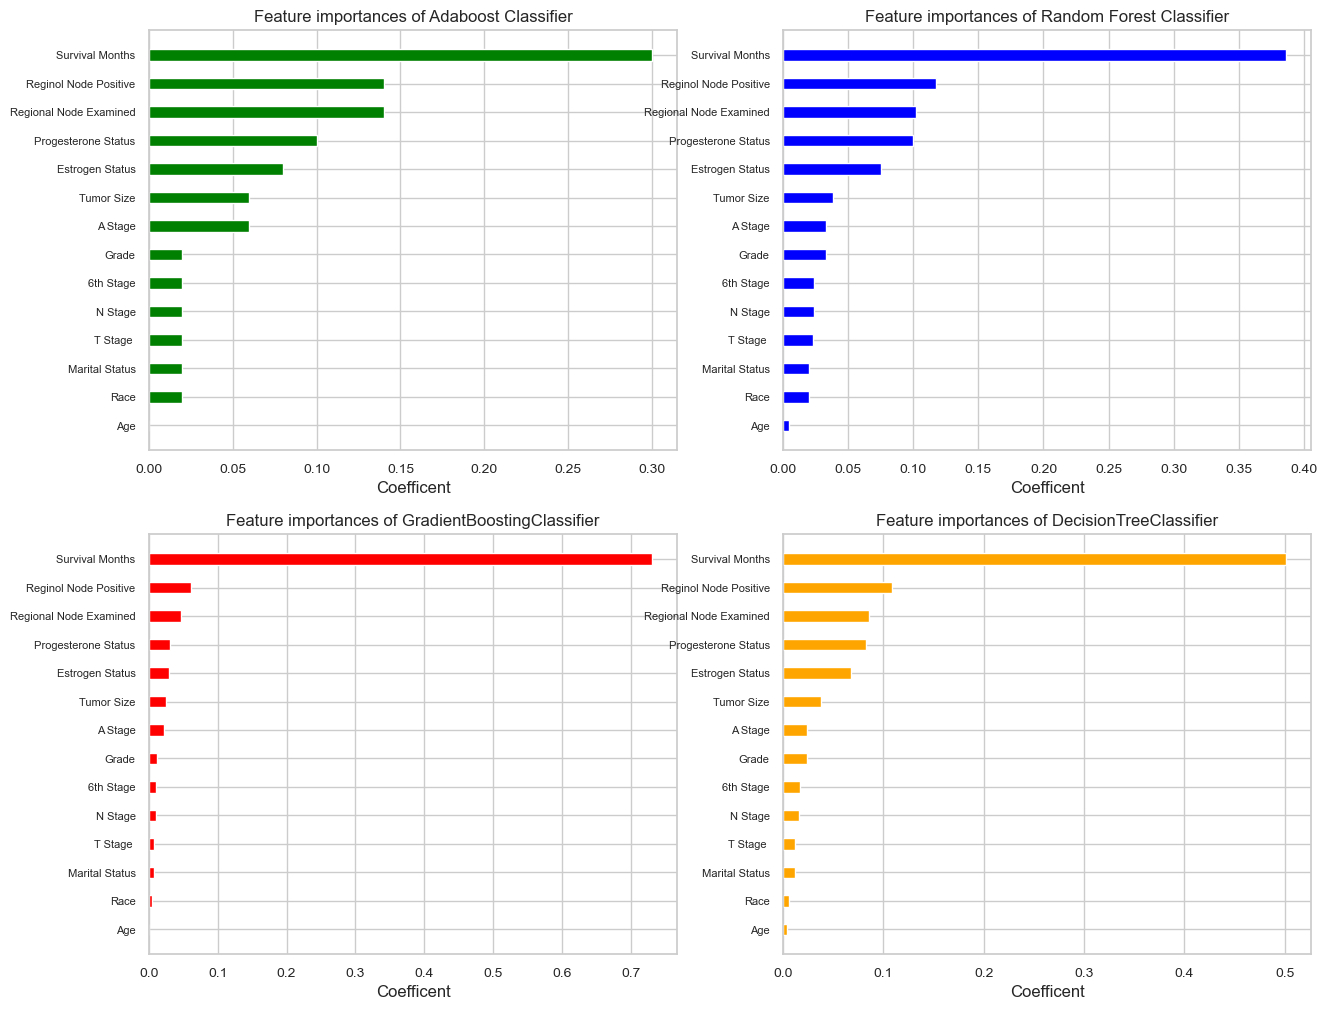

In [61]:
plt.figure(figsize=(15,12))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=8)

plt.subplot(221)
plt.barh(X_train.columns, np.sort(adaboost.feature_importances_), 0.4, color = 'green')
plt.title('Feature importances of Adaboost Classifier')
plt.xlabel('Coefficent')

plt.subplot(222)
plt.barh(X_train.columns, np.sort(rf.feature_importances_), 0.4,color = 'blue')
plt.title('Feature importances of Random Forest Classifier')
plt.xlabel('Coefficent')

plt.subplot(223)
plt.barh(X_train.columns, np.sort(gb.feature_importances_), 0.4, color = 'red')
plt.title('Feature importances of GradientBoostingClassifier')
plt.xlabel('Coefficent')

plt.subplot(224)
plt.barh(X_train.columns, np.sort(dt.feature_importances_), 0.4, color = 'orange')
plt.title('Feature importances of DecisionTreeClassifier')
plt.xlabel('Coefficent')

plt.show()

    In tree-based algorithms, an important variable is 'Survival Months' 


### Conclusion

    1. This dataset consists of 4024 rows × 16 columns.
    2. 15% died of breast cancer, 85% are alive. Unbalanced dataset 
    3. Breast cancer occurs at a young age from the age of 30. The old age is 69 years. 
    4. In the white race, 13% died of breast cancer, 72% are alive.
        Among the black race, 2% died, 5% are alive. For others, 1% died, 7% are alive.
    5. Grade 2 is more common in all races. 
       Grade 4 is only 3% common in the black race. None of the others
    6. Initial forms of cancer and stage IIIA are more common at all ages 
       Advanced forms IIIС occurs from 31 years of age, IIIB from 33 years of age. 
    7. Positive hormone receptor status is found in every race. Negative statuses are rare in blacks and others 
    8.  Patients diagnosed with breast cancer live an average of 40 to 110 months. 
    9. Breast cancer mortality: They die after an average of 40 months (3 years 4 months), regardless of the stage of the disease. In stage IIIB, they die after 35 months.
    10. In this dataset :  1. the white race die of breast cancer after living up to 40 months.
                           2. Black race die after living up to 50 months. 
                           3. Others die before 30 months. 
        Why so few? Because this dataset represents many whites than others and blacks.
    11. from 30 to 70 years of age day of breast cancer after living the first 40 months. 
         Why do they live so little? Because at a young age there is an aggressive form of breast cancer, the survival rate is minimal. Older age has many others diagnosis
    
    12. In tree-based algorithms, an important variable is 'Survival Months' 
    13. For this unbalanced dataset, the AdaBoostClassifier models predict better: Train 0.90, Test 0.89
                                                                            recall score: 0.50
                                                                            f1 score: 0.602
                                                                            precision score: 0.74

        GradientBoostingClassifier is also good, even better than AdaBoostClassifier Train: 0.92, Test: 0.90 but  
                                                                             recall score: 0.47, 
                                                                             f1 score: 0.59
                                                                             precision score: 0.80 lower than                                                                                              AdaBoostClassifier, but not so critical. 

        RandomForestClassifier, DecisionTreeClassifier is very much overfitting. 

       LogisticRegression', 'SVC' predicts very weakly. 
